In [1]:
from google.oauth2 import service_account
from google.cloud import bigquery

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
credentials = service_account.Credentials.from_service_account_file("./data/bigquery.json")

In [4]:
client = bigquery.Client(
    credentials = credentials,
    project = credentials.project_id
)

# 학교폭력 유형별 원형그래프

In [5]:
school_violence_type = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.school_violence_type`"

In [6]:
school_violence_type_df = client.query(school_violence_type).to_dataframe()

C:\Users\wlgus\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [7]:
school_violence_type_df

,연도,유형별_폭행 상해,유형별_금품갈취,유형별_성폭력,유형별_기타,처분별_구속,처분별_불구속,처분별_소년부 송치,처분별_기타
0,2017,10038,1191,1695,1076,61,10556,1296,2087
1,2016,9396,1161,1364,884,62,9852,1097,1794
2,2023,7549,1260,3871,2758,62,5728,2768,6880
3,2022,7413,1085,3631,2307,65,5791,2368,6212
4,2021,6000,935,2879,2154,66,5194,1459,5249
5,2020,5863,1184,2462,1822,79,7710,1332,2210
6,2019,7485,1328,3060,1711,84,9233,1587,2680
7,2018,7935,1377,2529,1526,86,9546,1319,2416


In [8]:
data = school_violence_type_df.iloc[4]  # 2021년 데이터 (다섯 번째 행)

In [9]:
data

연도            2021
유형별_폭행 상해     6000
유형별_금품갈취       935
유형별_성폭력       2879
유형별_기타        2154
처분별_구속          66
처분별_불구속       5194
처분별_소년부 송치    1459
처분별_기타        5249
Name: 4, dtype: Int64

In [10]:
# 첫 번째 원형 차트 데이터
labels1 = ['언어폭력', '집단따돌림', '신체폭력', '사이버폭력', '스토킹', '강요', '금품갈취', '성폭력']
sizes1 = [41.6, 15.5, 12.3, 9.9, 6.4, 5.4, 5.1, 3.8]

In [11]:
# 두 번째 원형 차트 데이터
labels2 = ['폭행상해', '성폭력', '기타', '금품갈취']
sizes2 = [data['유형별_폭행 상해'], data['유형별_성폭력'], 
          data['유형별_기타'], data['유형별_금품갈취']]
sizes2 = [size / sum(sizes2) * 100 for size in sizes2]  # 백분율 계산

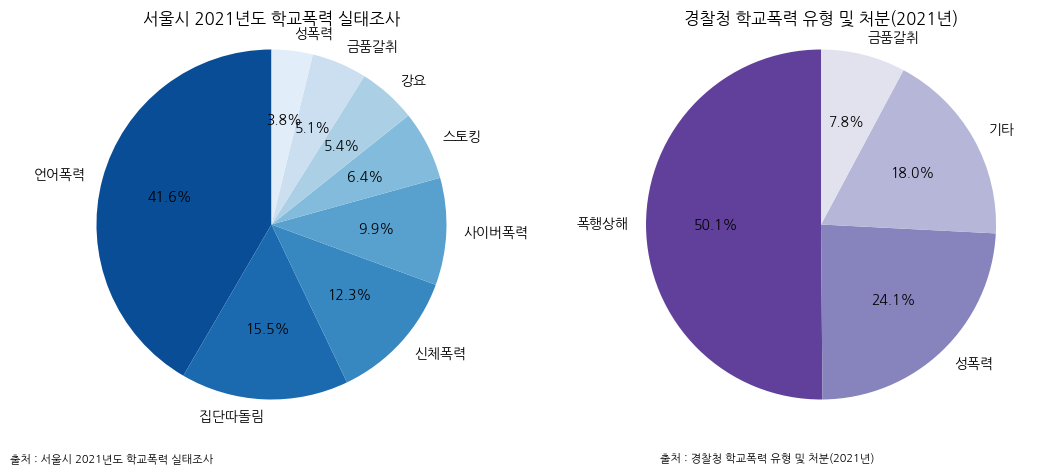

In [12]:
# 그래프 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# 첫 번째 원형 차트
colors1 = sns.color_palette('Blues_r', len(labels1))
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=90, colors=colors1)
ax1.axis('equal')
ax1.set_title('서울시 2021년도 학교폭력 실태조사')

# 두 번째 원형 차트
colors2 = sns.color_palette('Purples_r', len(labels2))
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=90, colors=colors2)
ax2.axis('equal')
ax2.set_title('경찰청 학교폭력 유형 및 처분(2021년)')

# 출처 추가
fig.text(0.1, 0.02, '출처 : 서울시 2021년도 학교폭력 실태조사', fontsize=8)
fig.text(0.6, 0.02, '출처 : 경찰청 학교폭력 유형 및 처분(2021년)', fontsize=8)

plt.show()

# 행정구별 학교폭력 신고건수

In [13]:
school_violence = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.school_violence`"

In [14]:
school_violence_df = client.query(school_violence).to_dataframe()

C:\Users\wlgus\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [15]:
school_violence_df

,접수년도,접수월,경찰서명,행정구,신고건수전체,신고성별남성,신고성별여성,신고성별불상,발생요일일요일,발생요일월요일,...,발생시간대14,발생시간대15,발생시간대16,발생시간대17,발생시간대18,발생시간대19,발생시간대20,발생시간대21,발생시간대22,발생시간대23
0,2021,1,서울강서,강서구,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2021,1,서울광진,광진구,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2021,1,서울서초,서초구,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2021,1,서울양천,양천구,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2021,1,서울구로,구로구,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2021,6,서울송파,송파구,12,4,7,1,1,1,...,0,0,1,2,2,0,1,1,0,0
286,2021,11,서울강서,강서구,13,5,7,1,4,2,...,0,0,0,1,2,0,2,2,1,1
287,2021,3,서울강서,강서구,11,3,8,0,0,0,...,1,1,0,1,2,1,1,0,3,0
288,2021,4,서울중랑,중랑구,12,0,8,4,1,0,...,0,3,0,1,2,2,1,0,1,1


In [16]:
# 행정구별 총 신고건수 계산
district_reports = school_violence_df.groupby('행정구')[' 신고건수전체'].sum().sort_values()

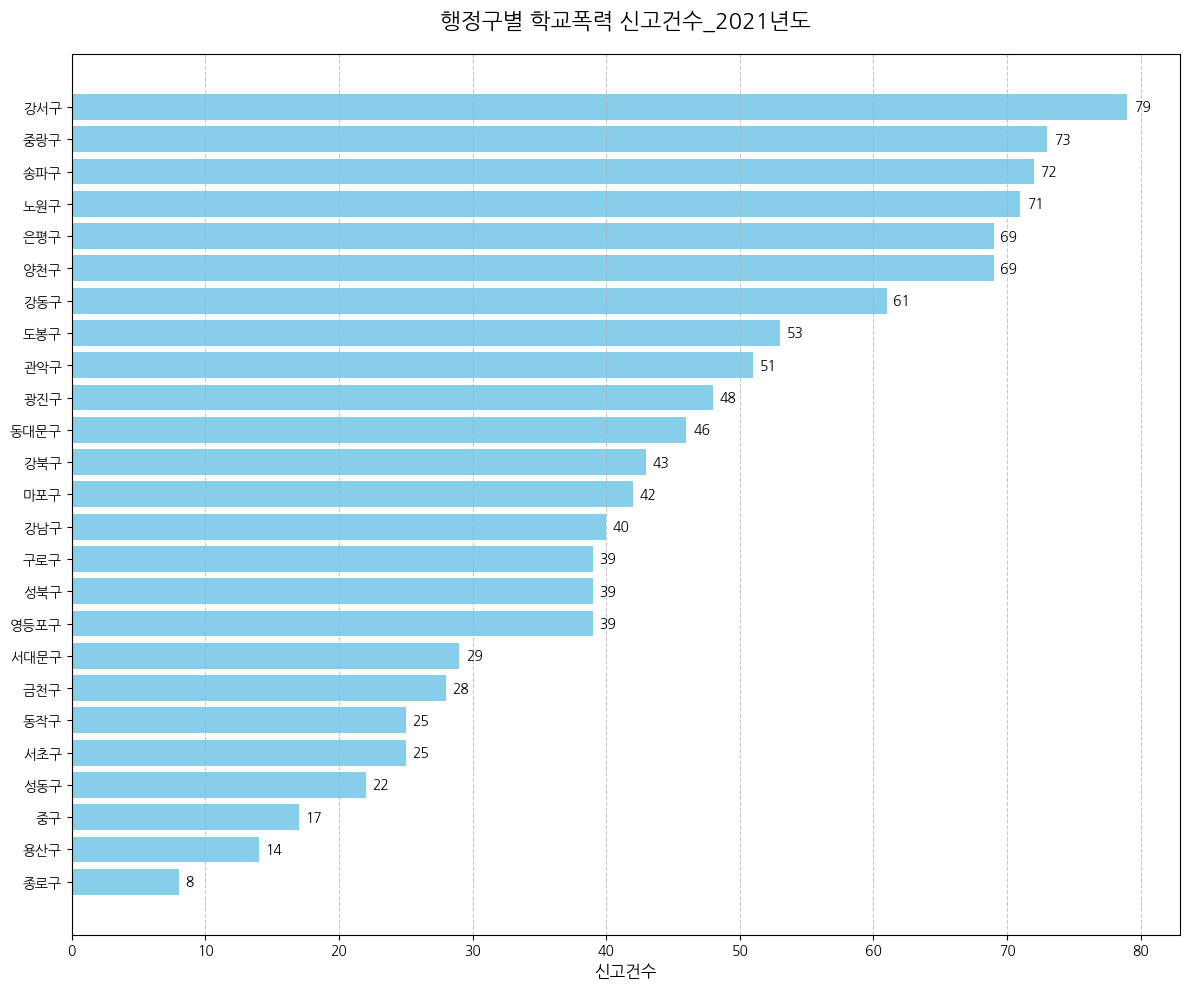

In [17]:
plt.figure(figsize=(12, 10))

bars = plt.barh(district_reports.index, district_reports.values, color='skyblue')

plt.title('행정구별 학교폭력 신고건수_2021년도', fontsize=16, pad=20)

plt.xlabel('신고건수', fontsize=12)

# y축 레이블 제거 (행정구 이름이 이미 표시되어 있으므로)
plt.ylabel('')

# 격자 추가
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 각 막대 끝에 값 표시
for i, v in enumerate(district_reports.values):
    plt.text(v + 0.5, i, str(v), va='center', fontsize=10)

# 여백 조정
plt.tight_layout()

plt.show()

# 연도별 학교폭력 사건 건수

In [18]:
print(school_violence_type_df.columns)

Index(['연도', '유형별_폭행 상해', '유형별_금품갈취', '유형별_성폭력', '유형별_기타', '처분별_구속', '처분별_불구속',
       '처분별_소년부 송치', '처분별_기타'],
      dtype='object')


In [19]:
school_violence_type_df

,연도,유형별_폭행 상해,유형별_금품갈취,유형별_성폭력,유형별_기타,처분별_구속,처분별_불구속,처분별_소년부 송치,처분별_기타
0,2017,10038,1191,1695,1076,61,10556,1296,2087
1,2016,9396,1161,1364,884,62,9852,1097,1794
2,2023,7549,1260,3871,2758,62,5728,2768,6880
3,2022,7413,1085,3631,2307,65,5791,2368,6212
4,2021,6000,935,2879,2154,66,5194,1459,5249
5,2020,5863,1184,2462,1822,79,7710,1332,2210
6,2019,7485,1328,3060,1711,84,9233,1587,2680
7,2018,7935,1377,2529,1526,86,9546,1319,2416


In [20]:
school_violence_type_df = school_violence_type_df.sort_values(by='연도')

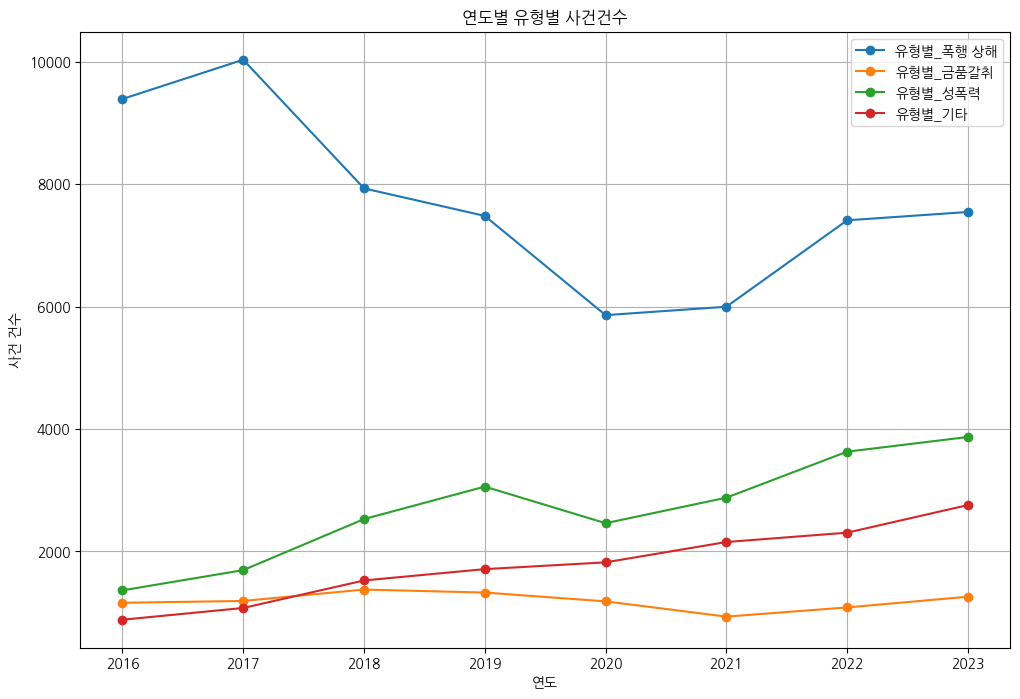

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(school_violence_type_df['연도'], school_violence_type_df['유형별_폭행 상해'], marker='o', linestyle='-', label='유형별_폭행 상해')
plt.plot(school_violence_type_df['연도'], school_violence_type_df['유형별_금품갈취'], marker='o', linestyle='-', label='유형별_금품갈취')
plt.plot(school_violence_type_df['연도'], school_violence_type_df['유형별_성폭력'], marker='o', linestyle='-', label='유형별_성폭력')
plt.plot(school_violence_type_df['연도'], school_violence_type_df['유형별_기타'], marker='o', linestyle='-', label='유형별_기타')

plt.xlabel('연도')
plt.ylabel('사건 건수')
plt.title('연도별 유형별 사건건수')
plt.legend()
plt.grid(True)
plt.show()

# 행정구별 대학진학률

In [22]:
gotocollege_2021 = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.gotocollege_2021`"

In [23]:
gotocollege_2021_df = client.query(gotocollege_2021).to_dataframe()

C:\Users\wlgus\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


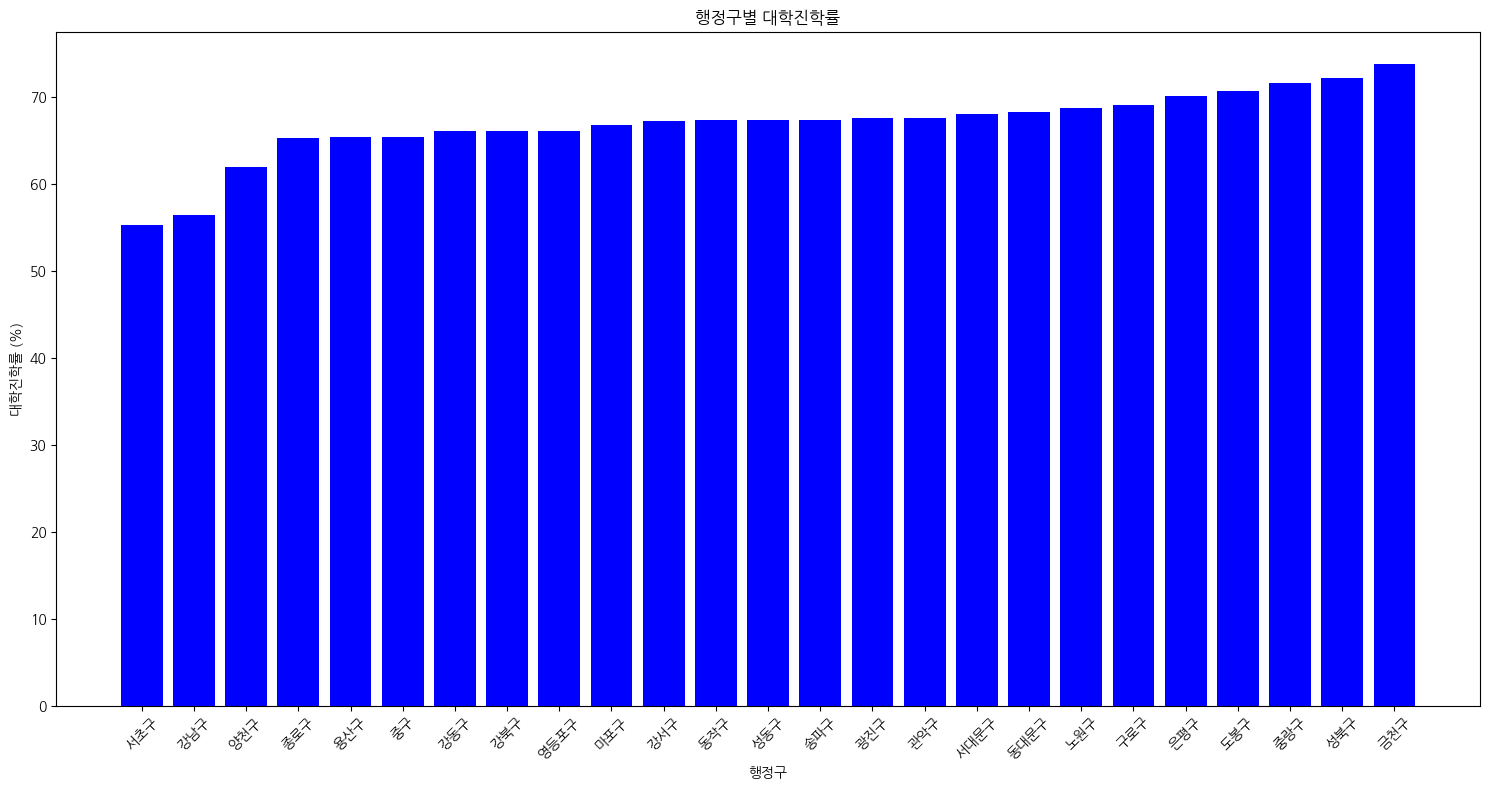

In [24]:
plt.figure(figsize=(15, 8))
plt.bar(gotocollege_2021_df['자치구'], gotocollege_2021_df['대학진학률'], color='blue')

plt.xlabel('행정구')
plt.ylabel('대학진학률 (%)')
plt.title('행정구별 대학진학률')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 대학진학률과 학교폭력 신고건수 간의 관계

In [25]:
gotocollege_2021_df = gotocollege_2021_df[['자치구', '대학진학률']]
school_violence_df = school_violence_df[['행정구', ' 신고건수전체']]

In [26]:
gotocollege_2021_df

,자치구,대학진학률
0,서초구,55.2
1,강남구,56.4
2,양천구,61.9
3,종로구,65.3
4,용산구,65.4
5,중구,65.4
6,강동구,66.1
7,강북구,66.1
8,영등포구,66.1
9,마포구,66.8


In [27]:
school_violence_df

,행정구,신고건수전체
0,강서구,1
1,광진구,1
2,서초구,1
3,양천구,1
4,구로구,1
...,...,...
285,송파구,12
286,강서구,13
287,강서구,11
288,중랑구,12


In [28]:
gotocollege_2021_df['행정구'] = gotocollege_2021_df['자치구'].str.replace(' ', '')
school_violence_df = school_violence_df.groupby('행정구')[' 신고건수전체'].sum().reset_index()

In [29]:
merged_df = pd.merge(gotocollege_2021_df, school_violence_df, on='행정구')

In [30]:
merged_df

,자치구,대학진학률,행정구,신고건수전체
0,서초구,55.2,서초구,25
1,강남구,56.4,강남구,40
2,양천구,61.9,양천구,69
3,종로구,65.3,종로구,8
4,용산구,65.4,용산구,14
5,중구,65.4,중구,17
6,강동구,66.1,강동구,61
7,강북구,66.1,강북구,43
8,영등포구,66.1,영등포구,39
9,마포구,66.8,마포구,42


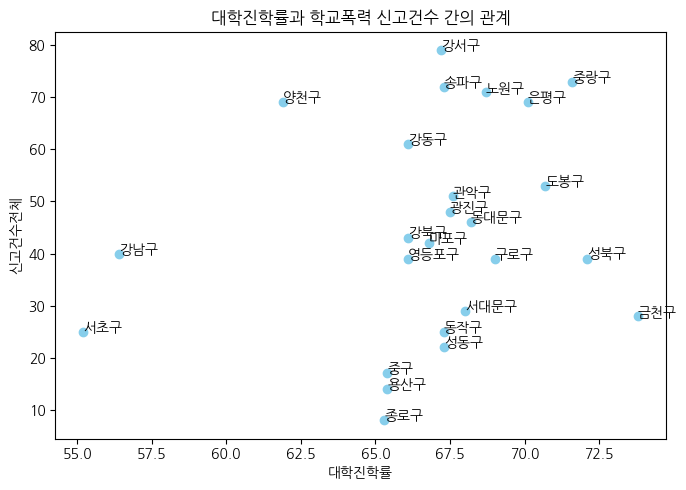

In [31]:
plt.figure(figsize=(7, 5))
plt.scatter(merged_df['대학진학률'], merged_df[' 신고건수전체'], color='skyblue')

for i in range(len(merged_df)):
    plt.text(merged_df['대학진학률'][i], merged_df[' 신고건수전체'][i], merged_df['행정구'][i], fontsize=10)

plt.xlabel('대학진학률')
plt.ylabel('신고건수전체')
plt.title('대학진학률과 학교폭력 신고건수 간의 관계')
plt.tight_layout()
plt.show()

# 학업성취도(학업중단율)과 학교폭력 신고 연관성 분석

In [32]:
stop_study_2021 = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.stop_study_2021`"
stop_study_2021_df = client.query(stop_study_2021).to_dataframe()

C:\Users\wlgus\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [33]:
stop_study_2021_df

,행정구,초등학교_학생수,초등학교_학업중단자수,초등학교_학업중단율,중학교_학생수,중학교_학업중단자수,중학교_학업중단율,고등학교_학생수,고등학교_학업중단자수,고등학교_학업중단율
0,중구,4808,96,2.00,1805,19,1.05,6185,150,2.43
1,성북구,19628,148,0.75,9510,64,0.67,8013,88,1.10
2,도봉구,13952,50,0.36,6437,25,0.39,6336,88,1.39
3,구로구,17290,62,0.36,8143,29,0.36,9020,116,1.29
4,금천구,8050,29,0.36,3962,12,0.30,3881,38,0.98
5,송파구,31235,450,1.44,16405,175,1.07,14183,237,1.67
6,노원구,24692,116,0.47,15213,69,0.45,19136,283,1.48
7,강북구,9412,31,0.33,6047,35,0.58,5238,61,1.16
8,강동구,22092,201,0.91,10878,65,0.60,10701,162,1.51
9,성동구,10555,159,1.51,4855,43,0.89,4044,81,2.00


In [34]:
stop_study_2021_df = stop_study_2021_df[['행정구', '초등학교_학업중단율', '중학교_학업중단율', '고등학교_학업중단율']]

In [35]:
merged_df = pd.merge(stop_study_2021_df, school_violence_df, on='행정구')

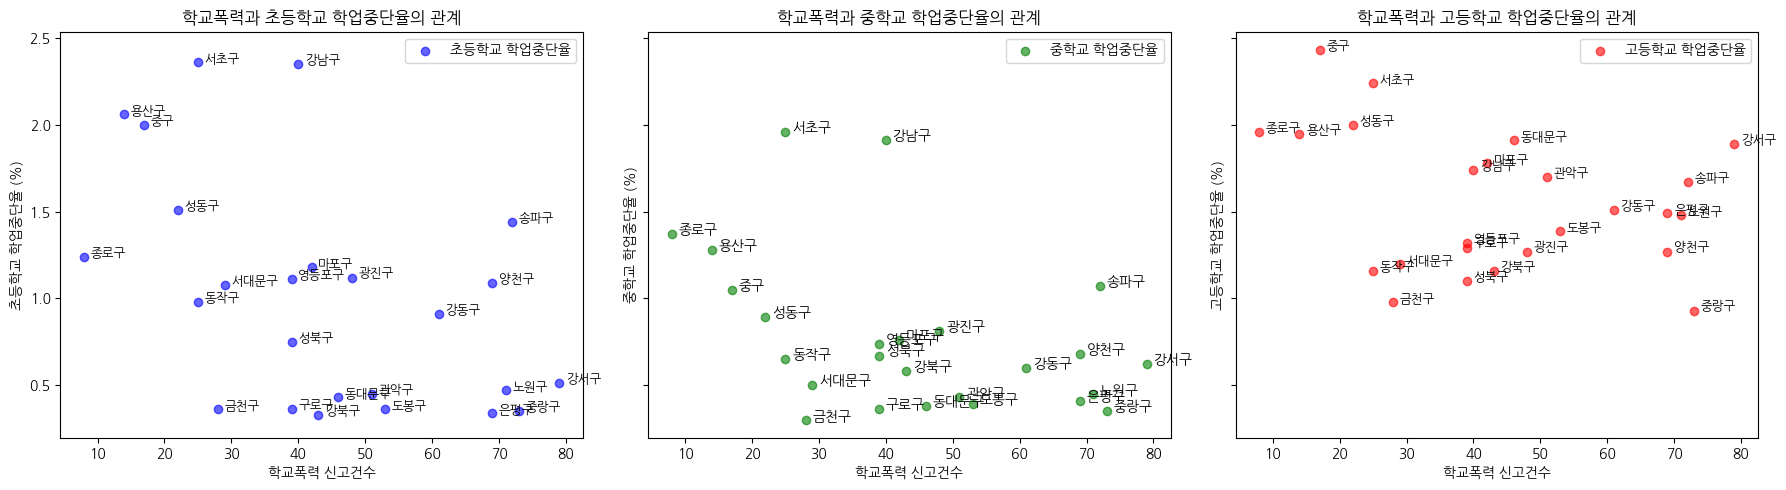

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot 1: 초등학교 학업중단율 vs 신고건수전체
axes[0].scatter(merged_df[' 신고건수전체'], merged_df['초등학교_학업중단율'], color='blue', alpha=0.6, label='초등학교 학업중단율')
axes[0].set_xlabel('학교폭력 신고건수')
axes[0].set_ylabel('초등학교 학업중단율 (%)')
axes[0].set_title('학교폭력과 초등학교 학업중단율의 관계')
axes[0].legend()

for i in range(len(merged_df)):
    axes[0].text(merged_df[' 신고건수전체'][i] + 1, merged_df['초등학교_학업중단율'][i], merged_df['행정구'][i], fontsize=9, ha='left')

# Plot 2: 중학교 학업중단율 vs 신고건수전체
axes[1].scatter(merged_df[' 신고건수전체'], merged_df['중학교_학업중단율'], color='green', alpha=0.6, label='중학교 학업중단율')
axes[1].set_xlabel('학교폭력 신고건수')
axes[1].set_ylabel('중학교 학업중단율 (%)')
axes[1].set_title('학교폭력과 중학교 학업중단율의 관계')
axes[1].legend()

for i in range(len(merged_df)):
    axes[1].text(merged_df[' 신고건수전체'][i] + 1, merged_df['중학교_학업중단율'][i], merged_df['행정구'][i], fontsize=10, ha='left')

# Plot 3: 고등학교 학업중단율 vs 신고건수전체
axes[2].scatter(merged_df[' 신고건수전체'], merged_df['고등학교_학업중단율'], color='red', alpha=0.6, label='고등학교 학업중단율')
axes[2].set_xlabel('학교폭력 신고건수')
axes[2].set_ylabel('고등학교 학업중단율 (%)')
axes[2].set_title('학교폭력과 고등학교 학업중단율의 관계')
axes[2].legend()

for i in range(len(merged_df)):
    axes[2].text(merged_df[' 신고건수전체'][i] + 1, merged_df['고등학교_학업중단율'][i], merged_df['행정구'][i], fontsize=9, ha='left')

plt.tight_layout()
plt.show()


# 학업성취도(학교유형)와 학교폭력 신고 연관성 분석

## 일반고, 자율고, 특목고, 특성화고 구분에 따른 연관성 

In [37]:
highschool = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.highschool`"
highschool_df = client.query(highschool).to_dataframe()

C:\Users\wlgus\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [38]:
highschool_df = highschool_df[['행정구', '학교구분']]

In [39]:
highschool_df

,행정구,학교구분
0,강서구,일반고
1,성북구,일반고
2,중구,일반고
3,강서구,일반고
4,성북구,일반고
...,...,...
313,동대문구,특성화고
314,동작구,특성화고
315,종로구,특성화고
316,노원구,특성화고


In [40]:
school_counts = highschool_df.groupby(['행정구', '학교구분']).size().unstack(fill_value=0).reset_index()

In [41]:
school_counts

학교구분,행정구,일반고,자율고,특목고,특성화고
0,강남구,14,3,3,2
1,강동구,10,1,1,2
2,강북구,4,2,0,1
3,강서구,14,1,2,6
4,관악구,11,1,1,4
5,광진구,6,1,2,0
6,구로구,6,2,2,4
7,금천구,4,0,1,1
8,노원구,16,1,0,8
9,도봉구,5,1,1,2


In [42]:
school_counts_total = school_counts.set_index('행정구').sum(axis=1)
school_percentages = school_counts.set_index('행정구').div(school_counts_total, axis=0) * 100
school_percentages.reset_index(inplace=True)

In [43]:
school_percentages

학교구분,행정구,일반고,자율고,특목고,특성화고
0,강남구,63.636364,13.636364,13.636364,9.090909
1,강동구,71.428571,7.142857,7.142857,14.285714
2,강북구,57.142857,28.571429,0.000000,14.285714
3,강서구,60.869565,4.347826,8.695652,26.086957
4,관악구,64.705882,5.882353,5.882353,23.529412
5,광진구,66.666667,11.111111,22.222222,0.000000
6,구로구,42.857143,14.285714,14.285714,28.571429
7,금천구,66.666667,0.000000,16.666667,16.666667
8,노원구,64.000000,4.000000,0.000000,32.000000
9,도봉구,55.555556,11.111111,11.111111,22.222222


In [44]:
merged_df = pd.merge(school_percentages, school_violence_df, on='행정구')

In [45]:
merged_df = merged_df.sort_values(by='일반고', ascending=False)

In [46]:
merged_df

,행정구,일반고,자율고,특목고,특성화고,신고건수전체
11,동작구,85.714286,0.000000,0.000000,14.285714,25
17,송파구,80.000000,5.000000,5.000000,10.000000,72
14,서초구,72.727273,18.181818,0.000000,9.090909,25
1,강동구,71.428571,7.142857,7.142857,14.285714,61
13,서대문구,71.428571,14.285714,14.285714,0.000000,29
5,광진구,66.666667,11.111111,22.222222,0.000000,48
19,영등포구,66.666667,22.222222,0.000000,11.111111,39
7,금천구,66.666667,0.000000,16.666667,16.666667,28
18,양천구,66.666667,13.333333,0.000000,20.000000,69
4,관악구,64.705882,5.882353,5.882353,23.529412,51


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22128\719455515.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(merged_df['행정구'], rotation=45)


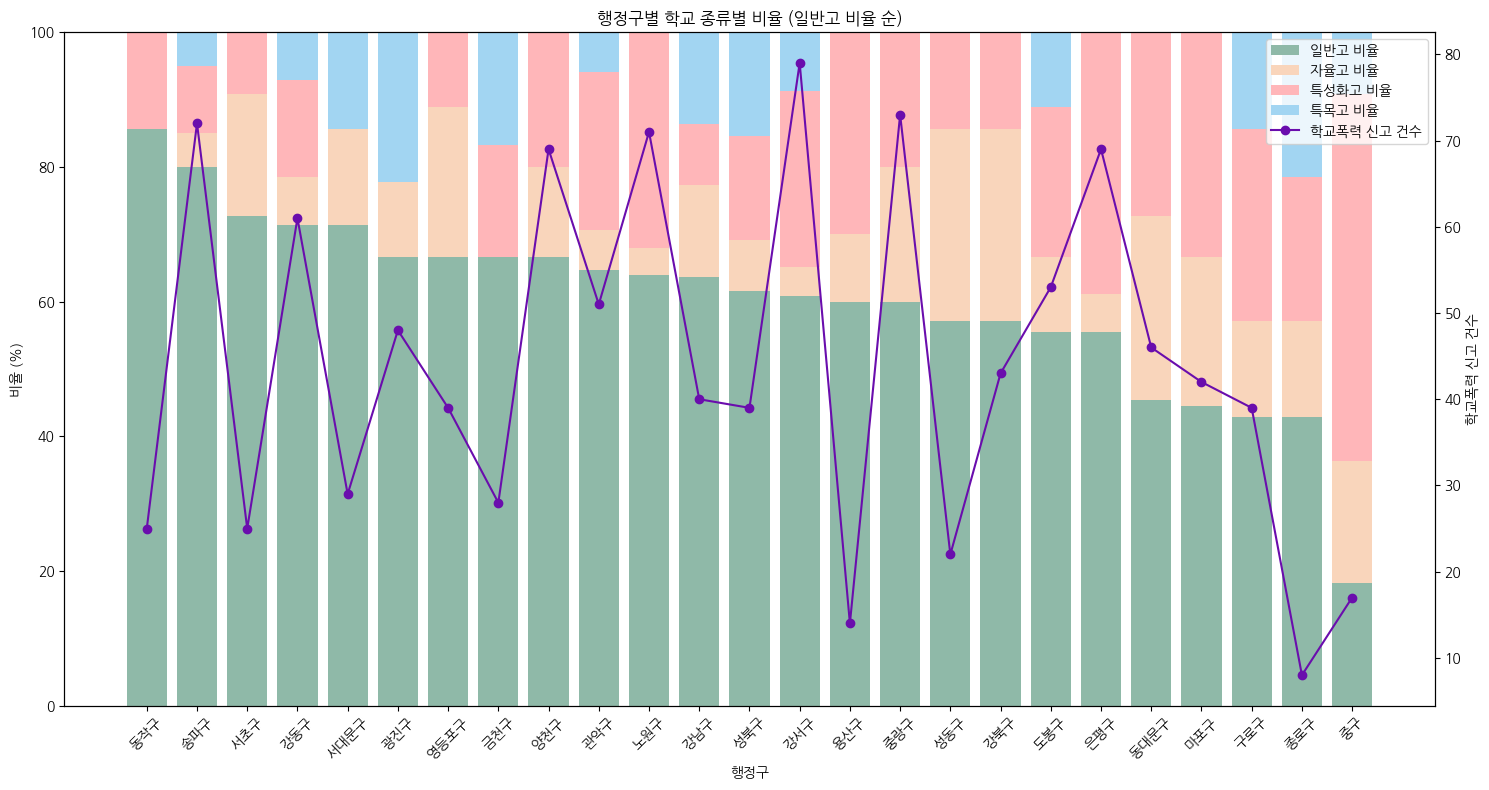

In [47]:
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plotting stacked bar chart
school_types = ['일반고', '자율고', '특성화고', '특목고']
bottom_value = np.zeros(len(merged_df))
colors = ['#8fb9a8', '#f9d5bb', '#ffb6b9', '#a2d5f2']  # Softer colors

bars = []  # 범례를 위한 막대 객체 저장
for i, school_type in enumerate(school_types):
    if school_type in merged_df.columns:
        bar = ax1.bar(merged_df['행정구'], merged_df[school_type], 
                     bottom=bottom_value, color=colors[i], 
                     label=f'{school_type} 비율')
        bars.append(bar)
        bottom_value += merged_df[school_type]

# x축, y축 레이블과 제목 설정
ax1.set_xlabel('행정구')
ax1.set_ylabel('비율 (%)')
ax1.set_title('행정구별 학교 종류별 비율 (일반고 비율 순)')
ax1.set_xticklabels(merged_df['행정구'], rotation=45)

# 두 번째 y축 생성 및 선 그래프 그리기
ax2 = ax1.twinx()
line = ax2.plot(merged_df['행정구'], merged_df[' 신고건수전체'], 
                color='#6a0dad', marker='o', linestyle='-', 
                label='학교폭력 신고 건수')[0]
ax2.set_ylabel('학교폭력 신고 건수')

# 범례 통합
lines_bars = bars + [line]
labels = [b.get_label() for b in bars] + [line.get_label()]
ax1.legend(lines_bars, labels, loc='upper right')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

## 남녀공학 구분에 따른 연관성 

In [48]:
highschool = "SELECT * FROM `airy-lodge-428805-j2.crime_seoul.highschool`"
highschool_df = client.query(highschool).to_dataframe()

C:\Users\wlgus\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [49]:
highschool_df = highschool_df[['행정구', '남녀공학구분']]

In [50]:
school_counts_2 = highschool_df.groupby(['행정구', '남녀공학구분']).size().unstack(fill_value=0).reset_index()
school_counts_total_2 = school_counts_2.set_index('행정구').sum(axis=1)
school_percentages_2 = school_counts_2.set_index('행정구').div(school_counts_total, axis=0) * 100
school_percentages_2.reset_index(inplace=True)

In [51]:
school_percentages_2

남녀공학구분,행정구,남,남여공학,여
0,강남구,31.818182,50.000000,18.181818
1,강동구,14.285714,71.428571,14.285714
2,강북구,14.285714,42.857143,42.857143
3,강서구,30.434783,47.826087,21.739130
4,관악구,11.764706,70.588235,17.647059
5,광진구,11.111111,66.666667,22.222222
6,구로구,7.142857,78.571429,14.285714
7,금천구,16.666667,50.000000,33.333333
8,노원구,20.000000,56.000000,24.000000
9,도봉구,11.111111,66.666667,22.222222


In [52]:
merged_df

,행정구,일반고,자율고,특목고,특성화고,신고건수전체
11,동작구,85.714286,0.000000,0.000000,14.285714,25
17,송파구,80.000000,5.000000,5.000000,10.000000,72
14,서초구,72.727273,18.181818,0.000000,9.090909,25
1,강동구,71.428571,7.142857,7.142857,14.285714,61
13,서대문구,71.428571,14.285714,14.285714,0.000000,29
5,광진구,66.666667,11.111111,22.222222,0.000000,48
19,영등포구,66.666667,22.222222,0.000000,11.111111,39
7,금천구,66.666667,0.000000,16.666667,16.666667,28
18,양천구,66.666667,13.333333,0.000000,20.000000,69
4,관악구,64.705882,5.882353,5.882353,23.529412,51


In [53]:
merged_df = pd.merge(school_percentages_2, school_violence_df, on='행정구')
merged_df = merged_df.sort_values(by='남', ascending=False)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_37088\2182686467.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(merged_df['행정구'], rotation=45)


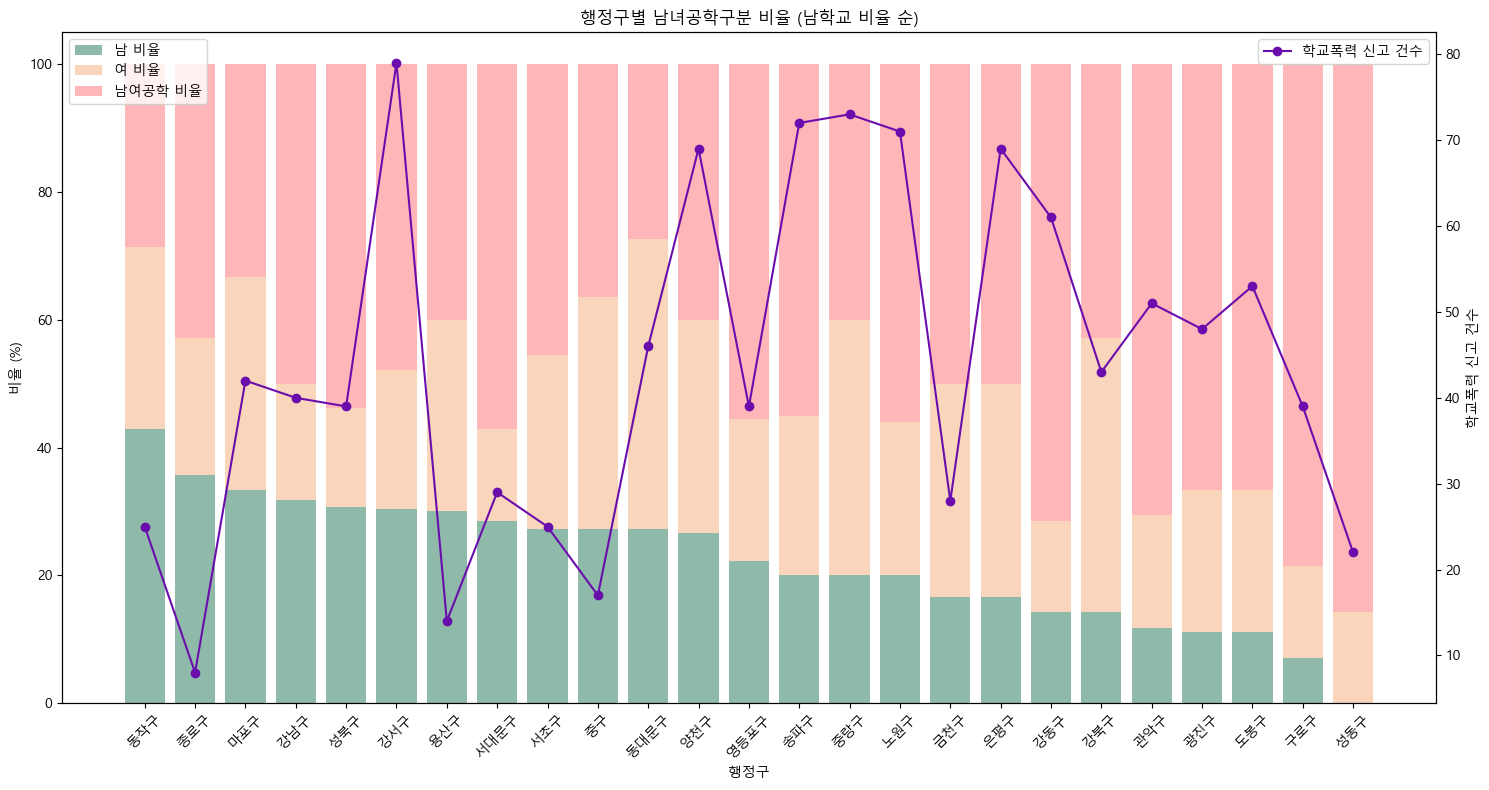

In [127]:
fig, ax1 = plt.subplots(figsize=(15, 8))

school_types = ['남', '여', '남여공학']
bottom_value = np.zeros(len(merged_df))
colors = ['#8fb9a8', '#f9d5bb', '#ffb6b9']  # Softer colors

for i, school_type in enumerate(school_types):
    if school_type in merged_df.columns:
        ax1.bar(merged_df['행정구'], merged_df[school_type], bottom=bottom_value, color=colors[i], label=f'{school_type} 비율')
        bottom_value += merged_df[school_type]

ax1.set_xlabel('행정구')
ax1.set_ylabel('비율 (%)')
ax1.set_title('행정구별 남녀공학구분 비율 (남학교 비율 순)')
ax1.set_xticklabels(merged_df['행정구'], rotation=45)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(merged_df['행정구'], merged_df[' 신고건수전체'], color='#6a0dad', marker='o', linestyle='-', label='학교폭력 신고 건수')  # Softer purple
ax2.set_ylabel('학교폭력 신고 건수')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


# 경제 수준과 학교 폭력 신고 건수 간의 연관성

In [56]:
tax_2021_df = client.query("SELECT * FROM `airy-lodge-428805-j2.crime_seoul.tax_2021`").to_dataframe()

C:\Users\wlgus\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [57]:
tax_2021_df = tax_2021_df[['행정구', '소득세', '상속세', '증여세', '종합부동산세', '증권거래세']]

In [58]:
tax_2021_df

,행정구,소득세,상속세,증여세,종합부동산세,증권거래세
0,강서구,1098252,31427,69326,81503,2182
1,양천구,916701,55789,120732,73327,1168
2,동작구,953485,82256,136725,76715,1289
3,동대문구,523330,50112,51271,30806,1510
4,도봉구,293873,18613,31891,14407,287
5,중구,5747605,109126,74181,365330,38097
6,구로구,713170,56906,40705,28464,1400
7,성북구,863338,129562,130209,53677,1595
8,서대문구,715787,49272,68312,38093,548
9,종로구,3169471,168176,161041,133597,24956


In [59]:
merged_df = pd.merge(tax_2021_df, school_violence_df, on='행정구')

In [60]:
merged_df

,행정구,소득세,상속세,증여세,종합부동산세,증권거래세,신고건수전체
0,강서구,1098252,31427,69326,81503,2182,79
1,양천구,916701,55789,120732,73327,1168,69
2,동작구,953485,82256,136725,76715,1289,25
3,동대문구,523330,50112,51271,30806,1510,46
4,도봉구,293873,18613,31891,14407,287,53
5,중구,5747605,109126,74181,365330,38097,17
6,구로구,713170,56906,40705,28464,1400,39
7,성북구,863338,129562,130209,53677,1595,39
8,서대문구,715787,49272,68312,38093,548,29
9,종로구,3169471,168176,161041,133597,24956,8


In [61]:
tax_columns = ['소득세', '상속세', '증여세', '종합부동산세', '증권거래세']
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd', '#d62728']  # Softer colors for each plot

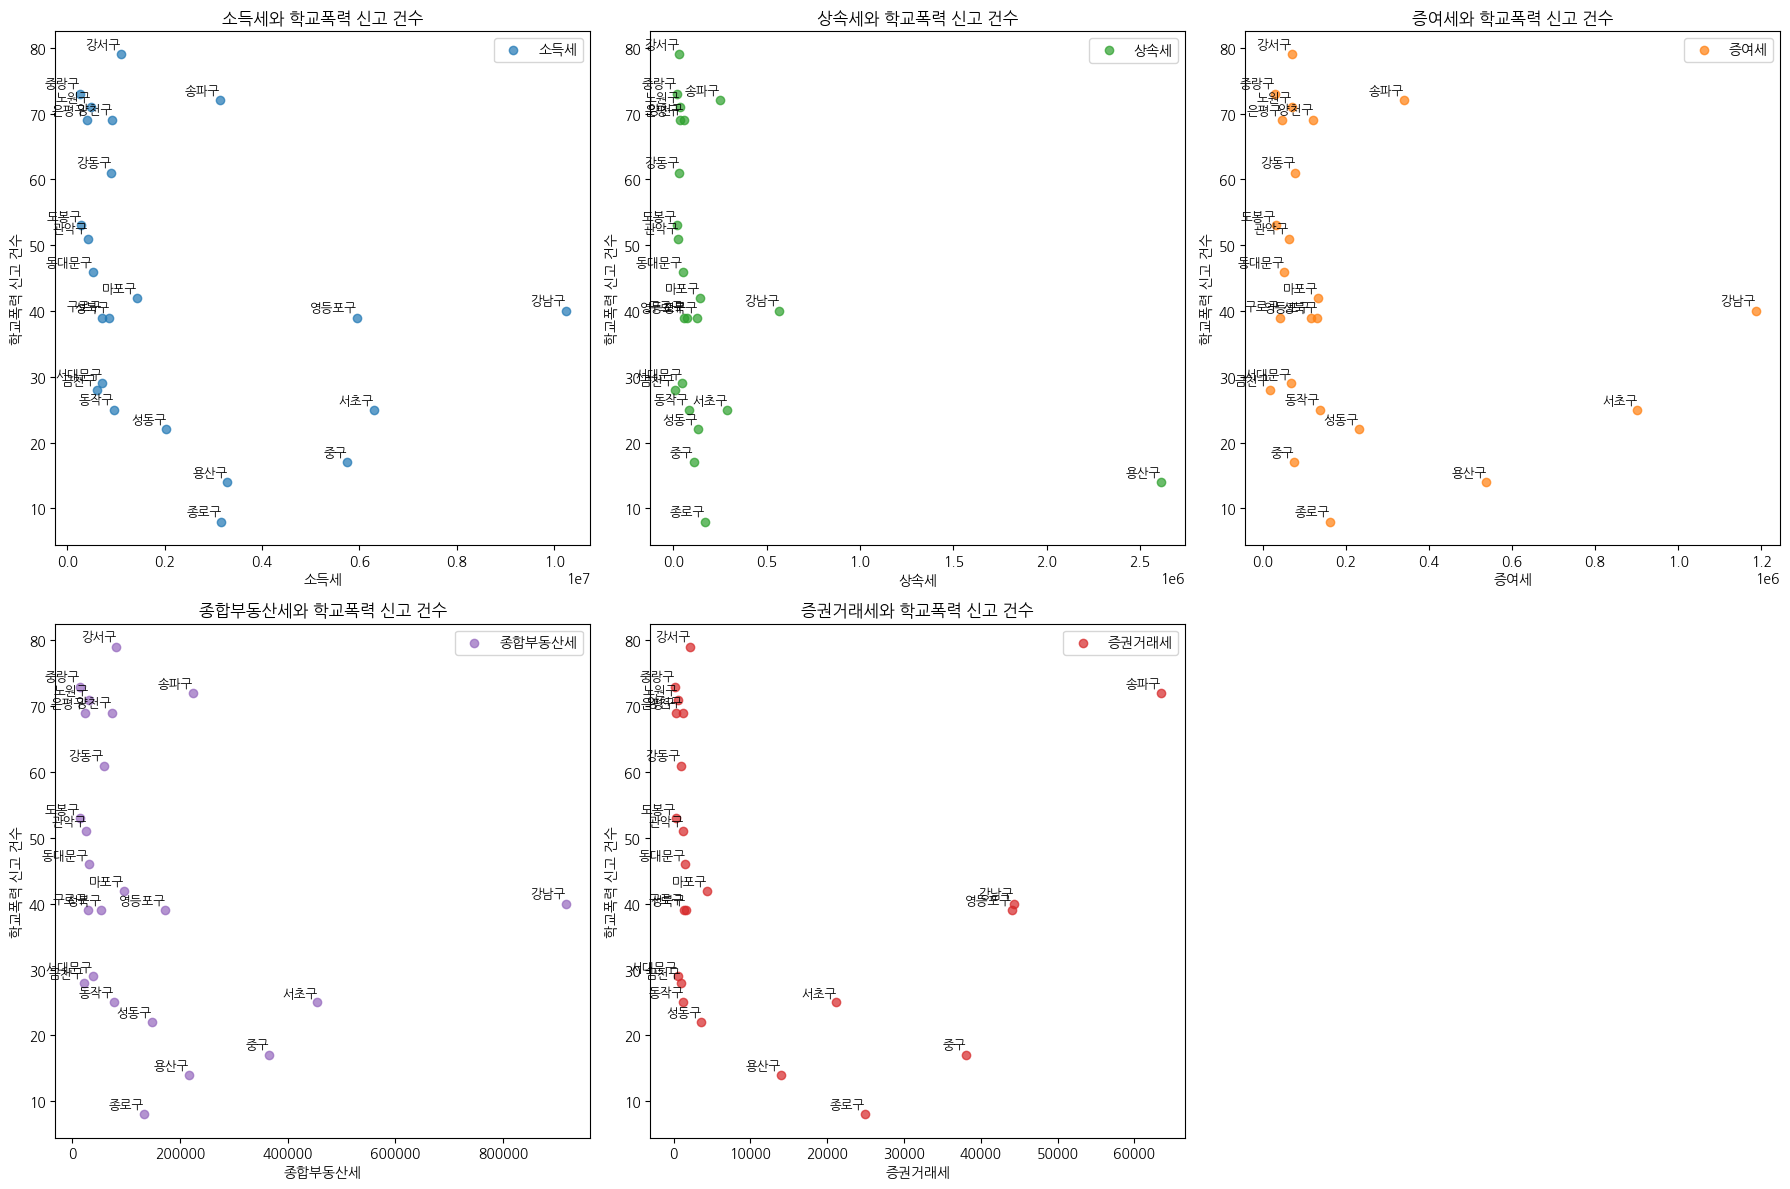

In [62]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, tax in enumerate(tax_columns):
    axes[i].scatter(merged_df[tax], merged_df[' 신고건수전체'], color=colors[i], alpha=0.7, label=f'{tax}')
    
    # Adding annotations for each point
    for j in range(len(merged_df)):
        axes[i].text(merged_df[tax].iloc[j], merged_df[' 신고건수전체'].iloc[j] + 1, merged_df['행정구'].iloc[j], fontsize=9, ha='right')
    
    axes[i].set_xlabel(tax)
    axes[i].set_ylabel('학교폭력 신고 건수')
    axes[i].set_title(f'{tax}와 학교폭력 신고 건수')
    axes[i].legend()

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


# 긍정적 환경(체육시설, 녹지)와 학교 폭력 신고 수 간의 연관성 분석

## 체육시설 수와 학교폭력 신고 수 

In [63]:
sports_infra_df = client.query("SELECT * FROM `airy-lodge-428805-j2.crime_seoul.sports_infra`").to_dataframe()

C:\Users\wlgus\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [64]:
sports_infra_df = sports_infra_df[['행정구']]

In [65]:
sports_facility_count = sports_infra_df['행정구'].value_counts().reset_index()
sports_facility_count.columns = ['행정구', '체육시설수']

In [66]:
sports_facility_count

,행정구,체육시설수
0,서초구,62
1,강서구,48
2,노원구,46
3,구로구,44
4,강동구,43
5,마포구,42
6,송파구,42
7,양천구,40
8,영등포구,38
9,용산구,38


In [67]:
merged_df = pd.merge(sports_facility_count, school_violence_df, on='행정구')
merged_df = merged_df.sort_values(by='체육시설수', ascending=False)

In [68]:
merged_df

,행정구,체육시설수,신고건수전체
0,서초구,62,25
1,강서구,48,79
2,노원구,46,71
3,구로구,44,39
4,강동구,43,61
5,마포구,42,42
6,송파구,42,72
7,양천구,40,69
8,영등포구,38,39
9,용산구,38,14


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22128\2225574783.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(merged_df['행정구'], rotation=45)


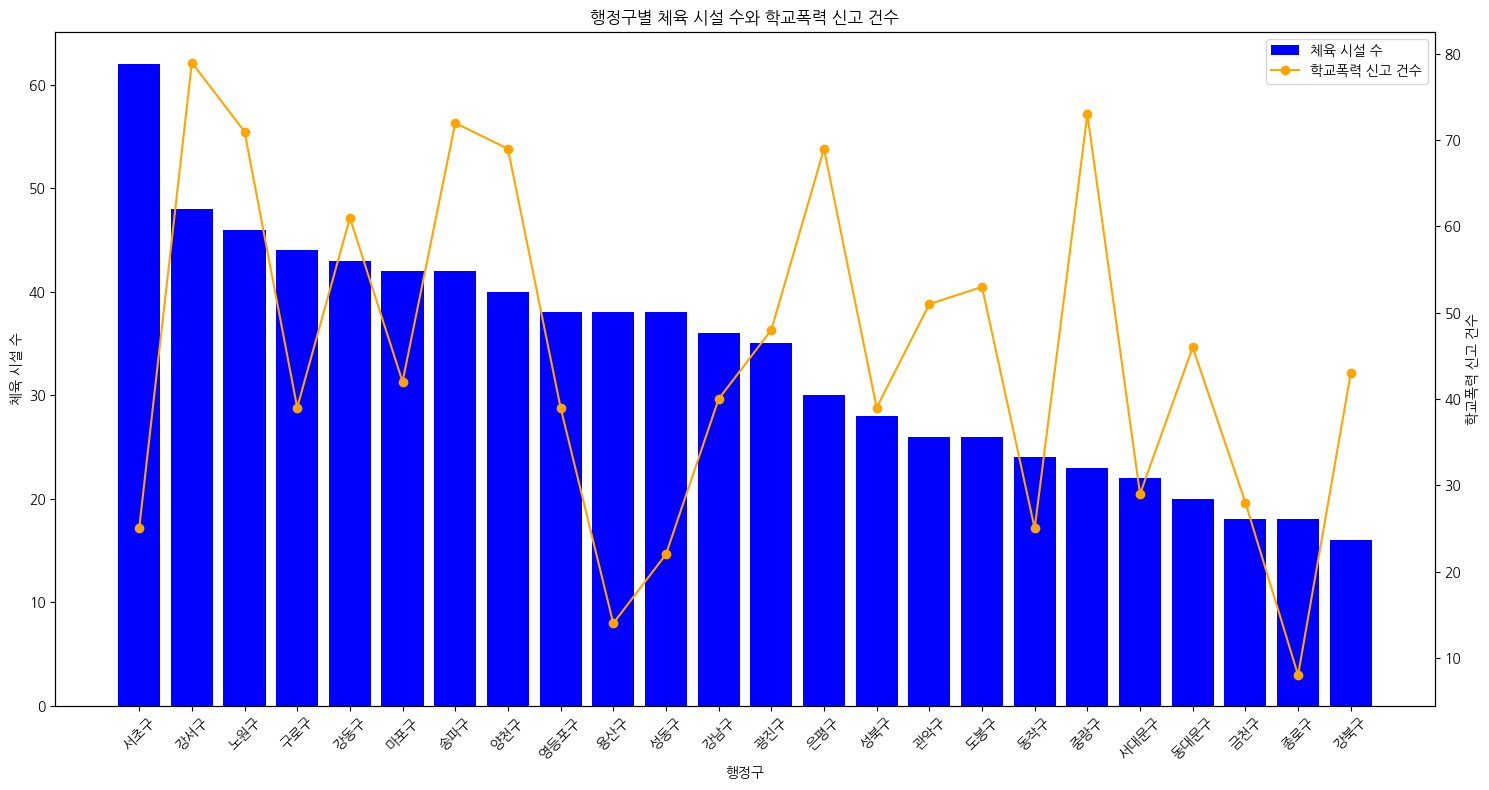

In [69]:
fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.bar(merged_df['행정구'], merged_df['체육시설수'], color='blue', label='체육 시설 수')
ax1.set_xlabel('행정구')
ax1.set_ylabel('체육 시설 수')
ax1.set_title('행정구별 체육 시설 수와 학교폭력 신고 건수')
ax1.set_xticklabels(merged_df['행정구'], rotation=45)

ax2 = ax1.twinx()
ax2.plot(merged_df['행정구'], merged_df[' 신고건수전체'], color='orange', marker='o', linestyle='-', label='학교폭력 신고 건수')
ax2.set_ylabel('학교폭력 신고 건수')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

## 녹지 면적과 학교폭력 신고 수 

In [70]:
green_space_df = client.query("SELECT * FROM `airy-lodge-428805-j2.crime_seoul.green_space`").to_dataframe()

C:\Users\wlgus\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [71]:
green_space_df = green_space_df[['시군구', '시설녹지 면적', '일반녹지 면적']]

In [72]:
green_space_df['총 녹지 면적'] = green_space_df['시설녹지 면적'] + green_space_df['일반녹지 면적']
green_space_df.rename(columns={'시군구': '행정구'}, inplace=True)

In [73]:
merged_df = pd.merge(green_space_df[['행정구', '총 녹지 면적']], school_violence_df, on='행정구')

merged_df = merged_df.sort_values(by='총 녹지 면적', ascending=False)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22128\1300095072.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(merged_df['행정구'], rotation=45)


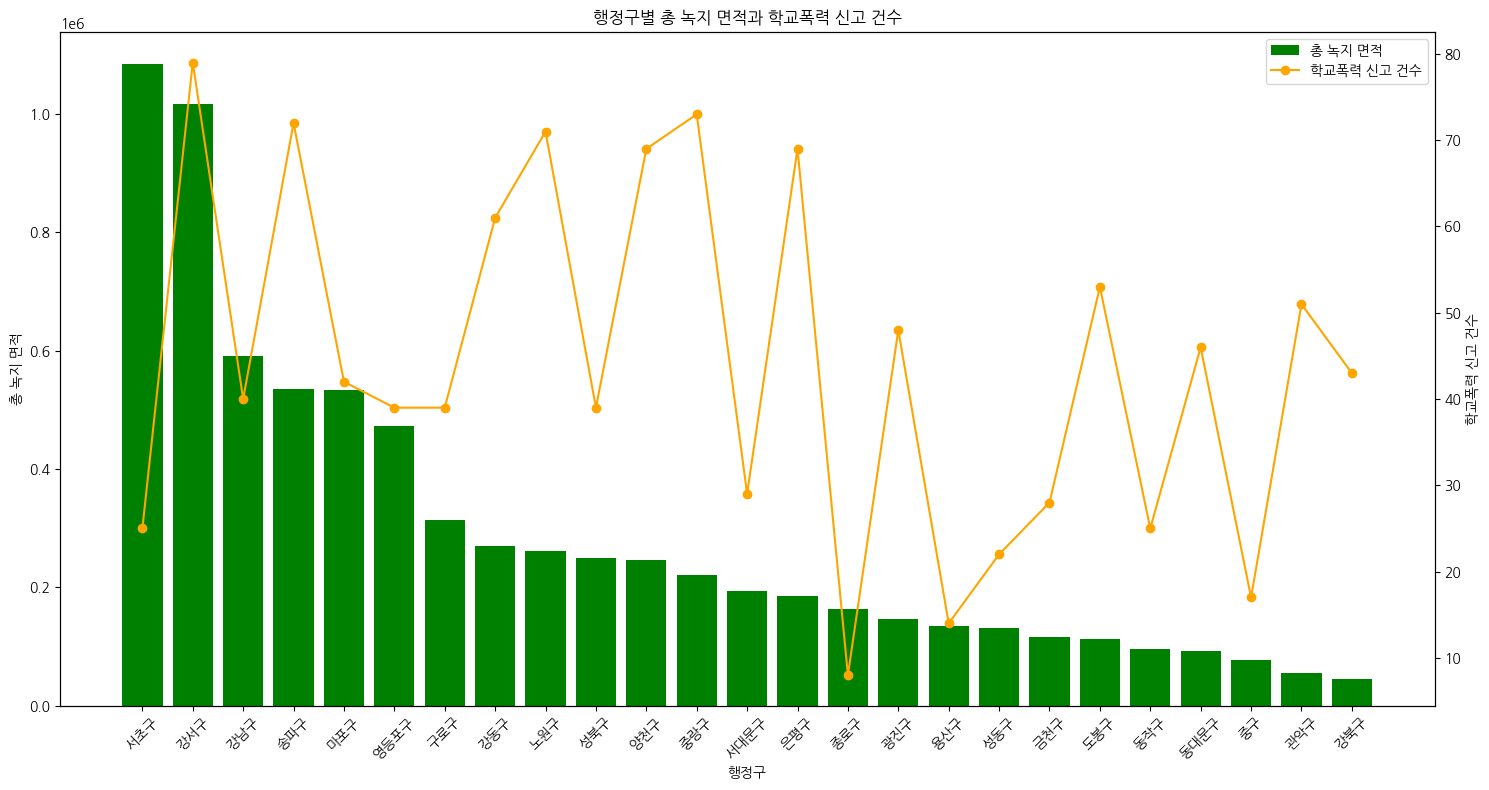

In [74]:
fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.bar(merged_df['행정구'], merged_df['총 녹지 면적'], color='green', label='총 녹지 면적')
ax1.set_xlabel('행정구')
ax1.set_ylabel('총 녹지 면적')
ax1.set_title('행정구별 총 녹지 면적과 학교폭력 신고 건수')
ax1.set_xticklabels(merged_df['행정구'], rotation=45)

ax2 = ax1.twinx()
ax2.plot(merged_df['행정구'], merged_df[' 신고건수전체'], color='orange', marker='o', linestyle='-', label='학교폭력 신고 건수')
ax2.set_ylabel('학교폭력 신고 건수')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

# 부정적 환경(술집, 유흥가, 클럽 등)과 학교 폭력 신고 연관성 분석

In [75]:
school_influence_data_df = client.query("SELECT * FROM `airy-lodge-428805-j2.crime_seoul.school_influence_data`").to_dataframe()

C:\Users\wlgus\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [76]:
school_influence_data_df

,신고년도,시도,행정구,총 신고 수,청소년비행신고수,학교폭력신고수,단란주점수2,무인텔수,생활숙박시설수,성인게임장수,술집수,여행숙박시설수,유흥주점수,클럽수
0,2021,서울특별시,양천구,975,916,59,64,<NA>,<NA>,6,572,1,4,<NA>
1,2021,서울특별시,중랑구,1535,1473,62,94,1,<NA>,9,686,<NA>,17,2
2,2021,서울특별시,강서구,1789,1717,72,159,<NA>,<NA>,15,954,<NA>,127,4
3,2021,서울특별시,도봉구,945,898,47,44,<NA>,<NA>,16,384,2,20,4
4,2021,서울특별시,노원구,1463,1395,68,40,<NA>,<NA>,9,590,1,18,5
5,2021,서울특별시,강동구,1256,1195,61,88,1,<NA>,15,653,1,110,6
6,2021,서울특별시,금천구,576,548,28,68,<NA>,1,15,467,1,46,4
7,2021,서울특별시,강북구,817,778,39,86,<NA>,1,28,632,1,64,8
8,2021,서울특별시,동대문구,692,649,43,78,<NA>,1,16,623,<NA>,65,8
9,2021,서울특별시,동작구,787,765,22,35,<NA>,2,4,574,<NA>,46,<NA>


In [77]:
school_influence_data_df.columns

Index(['신고년도', ' 시도', '행정구', ' 총 신고 수', ' 청소년비행신고수', '학교폭력신고수', ' 단란주점수2',
       ' 무인텔수', ' 생활숙박시설수', ' 성인게임장수', ' 술집수', ' 여행숙박시설수', ' 유흥주점수', ' 클럽수'],
      dtype='object')

In [78]:
school_influence_data_df.columns = school_influence_data_df.columns.str.strip().str.replace(r'\d+', '', regex=True)

In [79]:
school_influence_data_df = school_influence_data_df[['행정구', '단란주점수', '무인텔수', '생활숙박시설수', '성인게임장수', '술집수', '여행숙박시설수', '유흥주점수', '클럽수']]

In [80]:
merged_df = pd.merge(school_influence_data_df, school_violence_df, on='행정구')

In [81]:
merged_df.fillna(0, inplace=True)

In [82]:
merged_df['총 시설 수'] = merged_df[['단란주점수', '무인텔수', '생활숙박시설수', '성인게임장수', '술집수', '여행숙박시설수', '유흥주점수', '클럽수']].sum(axis=1)

In [83]:
merged_df = merged_df.sort_values(by='총 시설 수', ascending=False)

In [84]:
merged_df

,행정구,단란주점수,무인텔수,생활숙박시설수,성인게임장수,술집수,여행숙박시설수,유흥주점수,클럽수,신고건수전체,총 시설 수
17,강남구,205,2,4,2,1976,1,166,52,40,2408
24,마포구,64,0,35,2,1928,15,49,51,42,2144
14,송파구,139,2,2,10,1133,0,85,7,72,1378
19,영등포구,194,0,5,17,980,3,135,12,39,1346
15,관악구,80,0,2,64,952,0,186,16,51,1300
2,강서구,159,0,0,15,954,0,127,4,79,1259
21,용산구,91,0,16,0,1068,6,21,48,14,1250
23,종로구,103,1,22,17,906,5,178,3,8,1235
20,서초구,85,1,16,8,921,3,42,23,25,1099
22,중구,60,1,20,7,755,10,213,4,17,1070


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22128\3578635800.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(merged_df['행정구'], rotation=45)


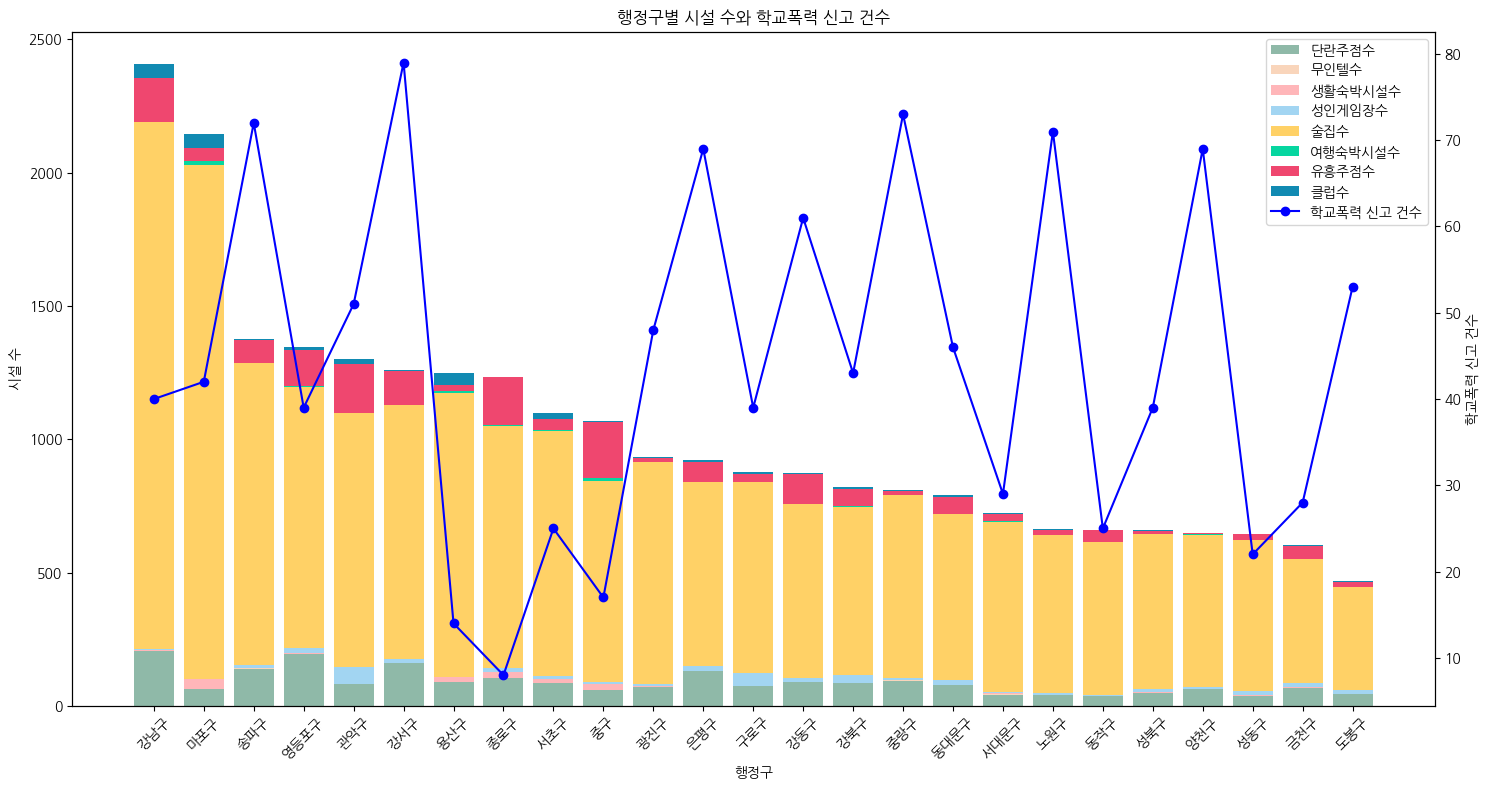

In [85]:
fig, ax1 = plt.subplots(figsize=(15, 8))

facility_types = ['단란주점수', '무인텔수', '생활숙박시설수', '성인게임장수', '술집수', '여행숙박시설수', '유흥주점수', '클럽수']
bottom_value = np.zeros(len(merged_df))
colors = ['#8fb9a8', '#f9d5bb', '#ffb6b9', '#a2d5f2', '#ffd166', '#06d6a0', '#ef476f', '#118ab2']  # Softer colors

for i, facility in enumerate(facility_types):
    if facility in merged_df.columns:
        ax1.bar(merged_df['행정구'], merged_df[facility], bottom=bottom_value, color=colors[i], label=facility)
        bottom_value += merged_df[facility]

ax1.set_xlabel('행정구')
ax1.set_ylabel('시설 수')
ax1.set_title('행정구별 시설 수와 학교폭력 신고 건수')
ax1.set_xticklabels(merged_df['행정구'], rotation=45)

ax2 = ax1.twinx()
ax2.plot(merged_df['행정구'], merged_df[' 신고건수전체'], color='blue', marker='o', linestyle='-', label='학교폭력 신고 건수')
ax2.set_ylabel('학교폭력 신고 건수')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

# 가정 환경과 학교 폭력 연관성 분석

In [86]:
divorce_rate_2021_df = client.query("SELECT * FROM `airy-lodge-428805-j2.crime_seoul.divorce_rate_2021`").to_dataframe()

C:\Users\wlgus\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [87]:
divorce_rate_2021_df.rename(columns={'조이혼율_천명당': '조이혼율'}, inplace=True)

In [88]:
merged_df = pd.merge(school_violence_df, divorce_rate_2021_df, on='행정구')

In [89]:
merged_df = merged_df.sort_values(by='이혼건수', ascending=False)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22128\2940072880.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(merged_df['행정구'], rotation=45)


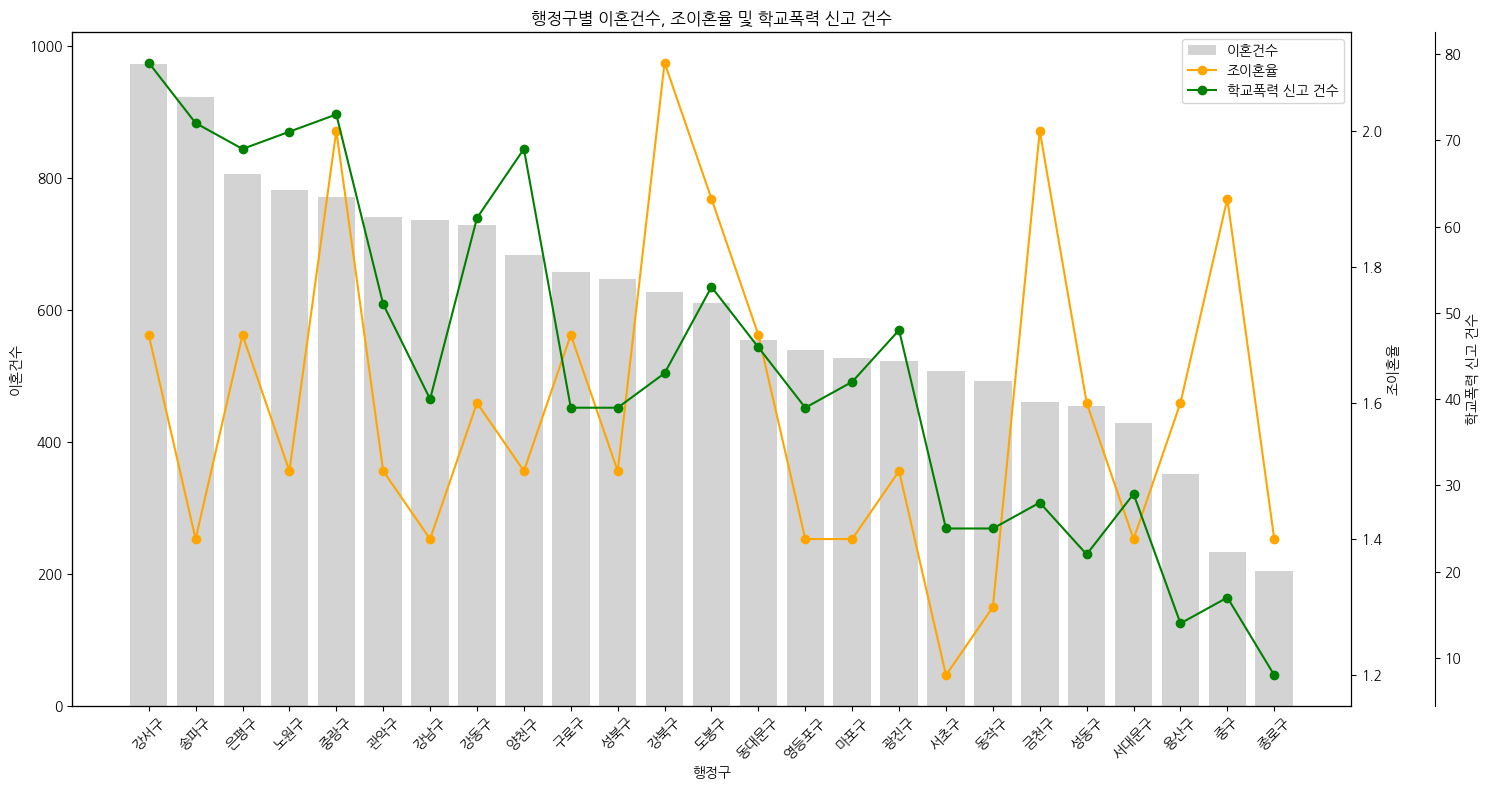

In [90]:
fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.bar(merged_df['행정구'], merged_df['이혼건수'], color='lightgray', label='이혼건수')
ax1.set_xlabel('행정구')
ax1.set_ylabel('이혼건수')
ax1.set_title('행정구별 이혼건수, 조이혼율 및 학교폭력 신고 건수')
ax1.set_xticklabels(merged_df['행정구'], rotation=45)

ax2 = ax1.twinx()
ax2.plot(merged_df['행정구'], merged_df['조이혼율'], color='orange', marker='o', linestyle='-', label='조이혼율')
ax2.set_ylabel('조이혼율')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the third axis outward
ax3.plot(merged_df['행정구'], merged_df[' 신고건수전체'], color='green', marker='o', linestyle='-', label='학교폭력 신고 건수')
ax3.set_ylabel('학교폭력 신고 건수')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper right')

plt.tight_layout()
plt.show()

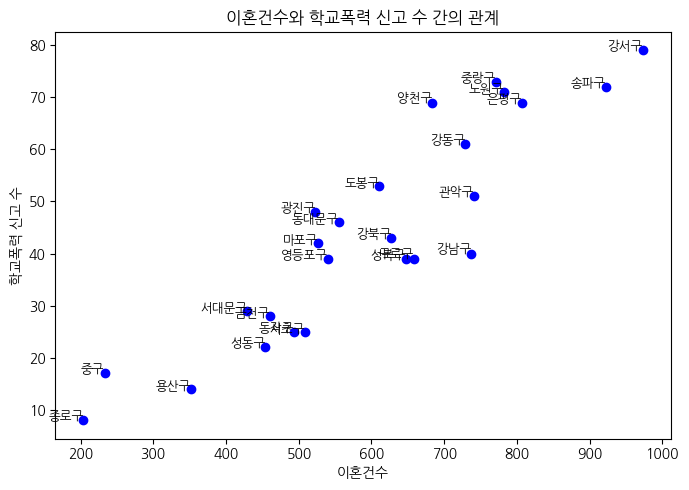

In [91]:
plt.figure(figsize=(7, 5))
plt.scatter(merged_df['이혼건수'], merged_df[' 신고건수전체'], color='blue')

for i in range(len(merged_df)):
    plt.text(merged_df['이혼건수'].iloc[i], merged_df[' 신고건수전체'].iloc[i], merged_df['행정구'].iloc[i], fontsize=9, ha='right')

plt.xlabel('이혼건수')
plt.ylabel('학교폭력 신고 수')
plt.title('이혼건수와 학교폭력 신고 수 간의 관계')

plt.tight_layout()
plt.show()

# 상관관계 히트맵

In [92]:
gotocollege_2021_df = client.query("SELECT * FROM `airy-lodge-428805-j2.crime_seoul.gotocollege_2021`").to_dataframe()
tax_2021_df = client.query("SELECT * FROM `airy-lodge-428805-j2.crime_seoul.tax_2021`").to_dataframe()
divorce_rate_2021_df = client.query("SELECT * FROM `airy-lodge-428805-j2.crime_seoul.divorce_rate_2021`").to_dataframe()
green_space_df = client.query("SELECT * FROM `airy-lodge-428805-j2.crime_seoul.green_space`").to_dataframe()
stop_study_2021_df = client.query("SELECT * FROM `airy-lodge-428805-j2.crime_seoul.stop_study_2021`").to_dataframe()
school_list_df = client.query("SELECT * FROM `airy-lodge-428805-j2.crime_seoul.school_list`").to_dataframe()
school_influence_data_df = client.query("SELECT * FROM `airy-lodge-428805-j2.crime_seoul.school_influence_data`").to_dataframe()
school_violence_df = client.query("SELECT * FROM `airy-lodge-428805-j2.crime_seoul.school_violence`").to_dataframe()

C:\Users\wlgus\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [93]:
college_data = gotocollege_2021_df[['자치구', '대학진학률']].rename(columns={'자치구': '행정구'})
tax_data = tax_2021_df[['행정구', '소득세', '상속세', '증여세', '증권거래세', '종합부동산세']]
divorce_data = divorce_rate_2021_df[['행정구', '이혼건수', '조이혼율_천명당']].rename(columns={'조이혼율_천명당': '조이혼율'})

In [94]:
green_data = green_space_df.copy()
green_data['전체녹지 면적'] = green_data['시설녹지 면적'] + green_data['일반녹지 면적']
green_data = green_data[['시군구', '전체녹지 면적', '아파트 및 학교 면적']].rename(columns={'시군구': '행정구'})

In [95]:
study_data = stop_study_2021_df[['행정구', '초등학교_학생수', '중학교_학생수', '고등학교_학생수',
                                '초등학교_학업중단율', '중학교_학업중단율', '고등학교_학업중단율']]

In [96]:
# 학교구분별 비율 계산
school_counts_1 = school_list_df.groupby(['행정구', '학교구분']).size().unstack(fill_value=0).reset_index()
school_counts_total_1 = school_counts_1.set_index('행정구').sum(axis=1)
school_percentages_1 = school_counts_1.set_index('행정구').div(school_counts_total_1, axis=0) * 100
school_percentages_1.reset_index(inplace=True)

In [97]:
# 일반실업구분별 비율 계산
school_counts_2 = school_list_df.groupby(['행정구', '일반실업구분']).size().unstack(fill_value=0).reset_index()
school_counts_total_2 = school_counts_2.set_index('행정구').sum(axis=1)
school_percentages_2 = school_counts_2.set_index('행정구').div(school_counts_total_2, axis=0) * 100
school_percentages_2.reset_index(inplace=True)

In [98]:
# 남녀공학구분별 비율 계산
school_counts_3 = school_list_df.groupby(['행정구', '남녀공학구분']).size().unstack(fill_value=0).reset_index()
school_counts_total_3 = school_counts_3.set_index('행정구').sum(axis=1)
school_percentages_3 = school_counts_3.set_index('행정구').div(school_counts_total_3, axis=0) * 100
school_percentages_3.reset_index(inplace=True)

In [99]:
# 설립구분별 비율 계산
school_counts_4 = school_list_df.groupby(['행정구', '설립구분']).size().unstack(fill_value=0).reset_index()
school_counts_total_4 = school_counts_4.set_index('행정구').sum(axis=1)
school_percentages_4 = school_counts_4.set_index('행정구').div(school_counts_total_4, axis=0) * 100
school_percentages_4.reset_index(inplace=True)

In [100]:
# 모든 비율 데이터프레임 병합
school_ratios = pd.merge(school_percentages_1, school_percentages_2, on='행정구', how='outer')
school_ratios = pd.merge(school_ratios, school_percentages_3, on='행정구', how='outer')
school_ratios = pd.merge(school_ratios, school_percentages_4, on='행정구', how='outer')

In [101]:
school_ratios

,행정구,일반고,자율고,특목고,특성화고,일반계,전문계,해당없음,남,남여공학,여,공립,국립,사립
0,강남구,41.216216,14.864865,27.027027,16.891892,67.961165,30.582524,1.456311,24.285714,65.238095,10.476190,49.523810,1.428571,49.047619
1,강동구,55.421687,4.819277,7.228916,32.530120,74.615385,20.769231,4.615385,7.518797,84.210526,8.270677,45.112782,0.000000,54.887218
2,강북구,66.101695,13.559322,0.000000,20.338983,82.022472,13.483146,4.494382,6.666667,43.333333,50.000000,50.000000,0.000000,50.000000
3,강서구,31.794872,0.512821,11.794872,55.897436,53.571429,43.253968,3.174603,18.897638,60.236220,20.866142,30.314961,0.000000,69.685039
4,관악구,28.837209,2.325581,6.511628,62.325581,41.176471,57.254902,1.568627,3.529412,83.921569,12.549020,48.627451,0.000000,51.372549
5,광진구,67.469880,4.819277,27.710843,0.000000,95.833333,0.000000,4.166667,4.166667,75.000000,20.833333,35.833333,0.000000,64.166667
6,구로구,23.157895,8.421053,9.473684,58.947368,54.814815,41.481481,3.703704,3.546099,82.269504,14.184397,45.390071,0.000000,54.609929
7,금천구,55.072464,0.000000,14.492754,30.434783,53.125000,45.833333,1.041667,5.154639,68.041237,26.804124,54.639175,11.340206,34.020619
8,노원구,29.004329,0.432900,0.000000,70.562771,44.590164,53.442623,1.967213,7.540984,76.721311,15.737705,34.098361,0.000000,65.901639
9,도봉구,21.568627,7.843137,11.764706,58.823529,63.218391,34.482759,2.298851,4.545455,69.318182,26.136364,59.090909,0.000000,40.909091


In [102]:
school_ratios.columns = [col if col == '행정구' else f'{col}_비율' for col in school_ratios.columns]

In [103]:
school_ratios

,행정구,일반고_비율,자율고_비율,특목고_비율,특성화고_비율,일반계_비율,전문계_비율,해당없음_비율,남_비율,남여공학_비율,여_비율,공립_비율,국립_비율,사립_비율
0,강남구,41.216216,14.864865,27.027027,16.891892,67.961165,30.582524,1.456311,24.285714,65.238095,10.476190,49.523810,1.428571,49.047619
1,강동구,55.421687,4.819277,7.228916,32.530120,74.615385,20.769231,4.615385,7.518797,84.210526,8.270677,45.112782,0.000000,54.887218
2,강북구,66.101695,13.559322,0.000000,20.338983,82.022472,13.483146,4.494382,6.666667,43.333333,50.000000,50.000000,0.000000,50.000000
3,강서구,31.794872,0.512821,11.794872,55.897436,53.571429,43.253968,3.174603,18.897638,60.236220,20.866142,30.314961,0.000000,69.685039
4,관악구,28.837209,2.325581,6.511628,62.325581,41.176471,57.254902,1.568627,3.529412,83.921569,12.549020,48.627451,0.000000,51.372549
5,광진구,67.469880,4.819277,27.710843,0.000000,95.833333,0.000000,4.166667,4.166667,75.000000,20.833333,35.833333,0.000000,64.166667
6,구로구,23.157895,8.421053,9.473684,58.947368,54.814815,41.481481,3.703704,3.546099,82.269504,14.184397,45.390071,0.000000,54.609929
7,금천구,55.072464,0.000000,14.492754,30.434783,53.125000,45.833333,1.041667,5.154639,68.041237,26.804124,54.639175,11.340206,34.020619
8,노원구,29.004329,0.432900,0.000000,70.562771,44.590164,53.442623,1.967213,7.540984,76.721311,15.737705,34.098361,0.000000,65.901639
9,도봉구,21.568627,7.843137,11.764706,58.823529,63.218391,34.482759,2.298851,4.545455,69.318182,26.136364,59.090909,0.000000,40.909091


In [104]:
school_influence_data_df.columns = school_influence_data_df.columns.str.strip().str.replace(r'\d+', '', regex=True)

In [105]:
influence_data = school_influence_data_df[['행정구', '단란주점수', '무인텔수', '생활숙박시설수',
                                         '성인게임장수', '술집수', '여행숙박시설수', '유흥주점수', '클럽수']]

In [106]:
violence_data = school_violence_df.groupby('행정구')[' 신고건수전체'].sum().reset_index()

In [107]:
df_merged = pd.merge(college_data, tax_data, on='행정구', how='outer')
df_merged = pd.merge(df_merged, divorce_data, on='행정구', how='outer')
df_merged = pd.merge(df_merged, green_data, on='행정구', how='outer')
df_merged = pd.merge(df_merged, study_data, on='행정구', how='outer')
df_merged = pd.merge(df_merged, school_ratios, on='행정구', how='outer')
df_merged = pd.merge(df_merged, influence_data, on='행정구', how='outer')
df_merged = pd.merge(df_merged, violence_data, on='행정구', how='outer')

In [108]:
df_merged.fillna(0, inplace=True)

In [109]:
df_merged

,행정구,대학진학률,소득세,상속세,증여세,증권거래세,종합부동산세,이혼건수,조이혼율,전체녹지 면적,...,사립_비율,단란주점수,무인텔수,생활숙박시설수,성인게임장수,술집수,여행숙박시설수,유흥주점수,클럽수,신고건수전체
0,강남구,56.4,10239094,567074,1187021,44298,916187,737,1.4,591345.8,...,49.047619,205,2,4,2,1976,1,166,52,40
1,강동구,66.1,899452,32433,76784,923,58063,729,1.6,269666.0,...,54.887218,88,1,0,15,653,1,110,6,61
2,강북구,66.1,0,0,0,0,0,627,2.1,45948.0,...,50.000000,86,0,1,28,632,1,64,8,43
3,강서구,67.2,1098252,31427,69326,2182,81503,973,1.7,1016861.0,...,69.685039,159,0,0,15,954,0,127,4,79
4,관악구,67.6,426240,28433,61895,1266,26346,741,1.5,54632.0,...,51.372549,80,0,2,64,952,0,186,16,51
5,광진구,67.5,0,0,0,0,0,523,1.5,146291.0,...,64.166667,71,0,3,7,834,0,14,5,48
6,구로구,69.0,713170,56906,40705,1400,28464,658,1.7,313907.0,...,54.609929,73,0,2,49,714,1,32,5,39
7,금천구,73.8,616415,8713,16145,948,21397,460,2.0,115493.0,...,34.020619,68,0,1,15,467,1,46,4,28
8,노원구,68.7,485962,35407,68768,613,31695,782,1.5,260980.0,...,65.901639,40,0,0,9,590,1,18,5,71
9,도봉구,70.7,293873,18613,31891,287,14407,611,1.9,113575.0,...,40.909091,44,0,0,16,384,2,20,4,53


In [110]:
# '행정구' 컬럼 제외하고 상관관계 계산
correlation_matrix = df_merged.drop('행정구', axis=1).corr()

In [111]:
# 열 순서 재배치: '신고건수전체'를 첫 번째로 이동
cols = [' 신고건수전체'] + [col for col in correlation_matrix.columns if col != ' 신고건수전체']
correlation_matrix = correlation_matrix.reindex(index=cols, columns=cols)

C:\Users\wlgus\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
C:\Users\wlgus\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


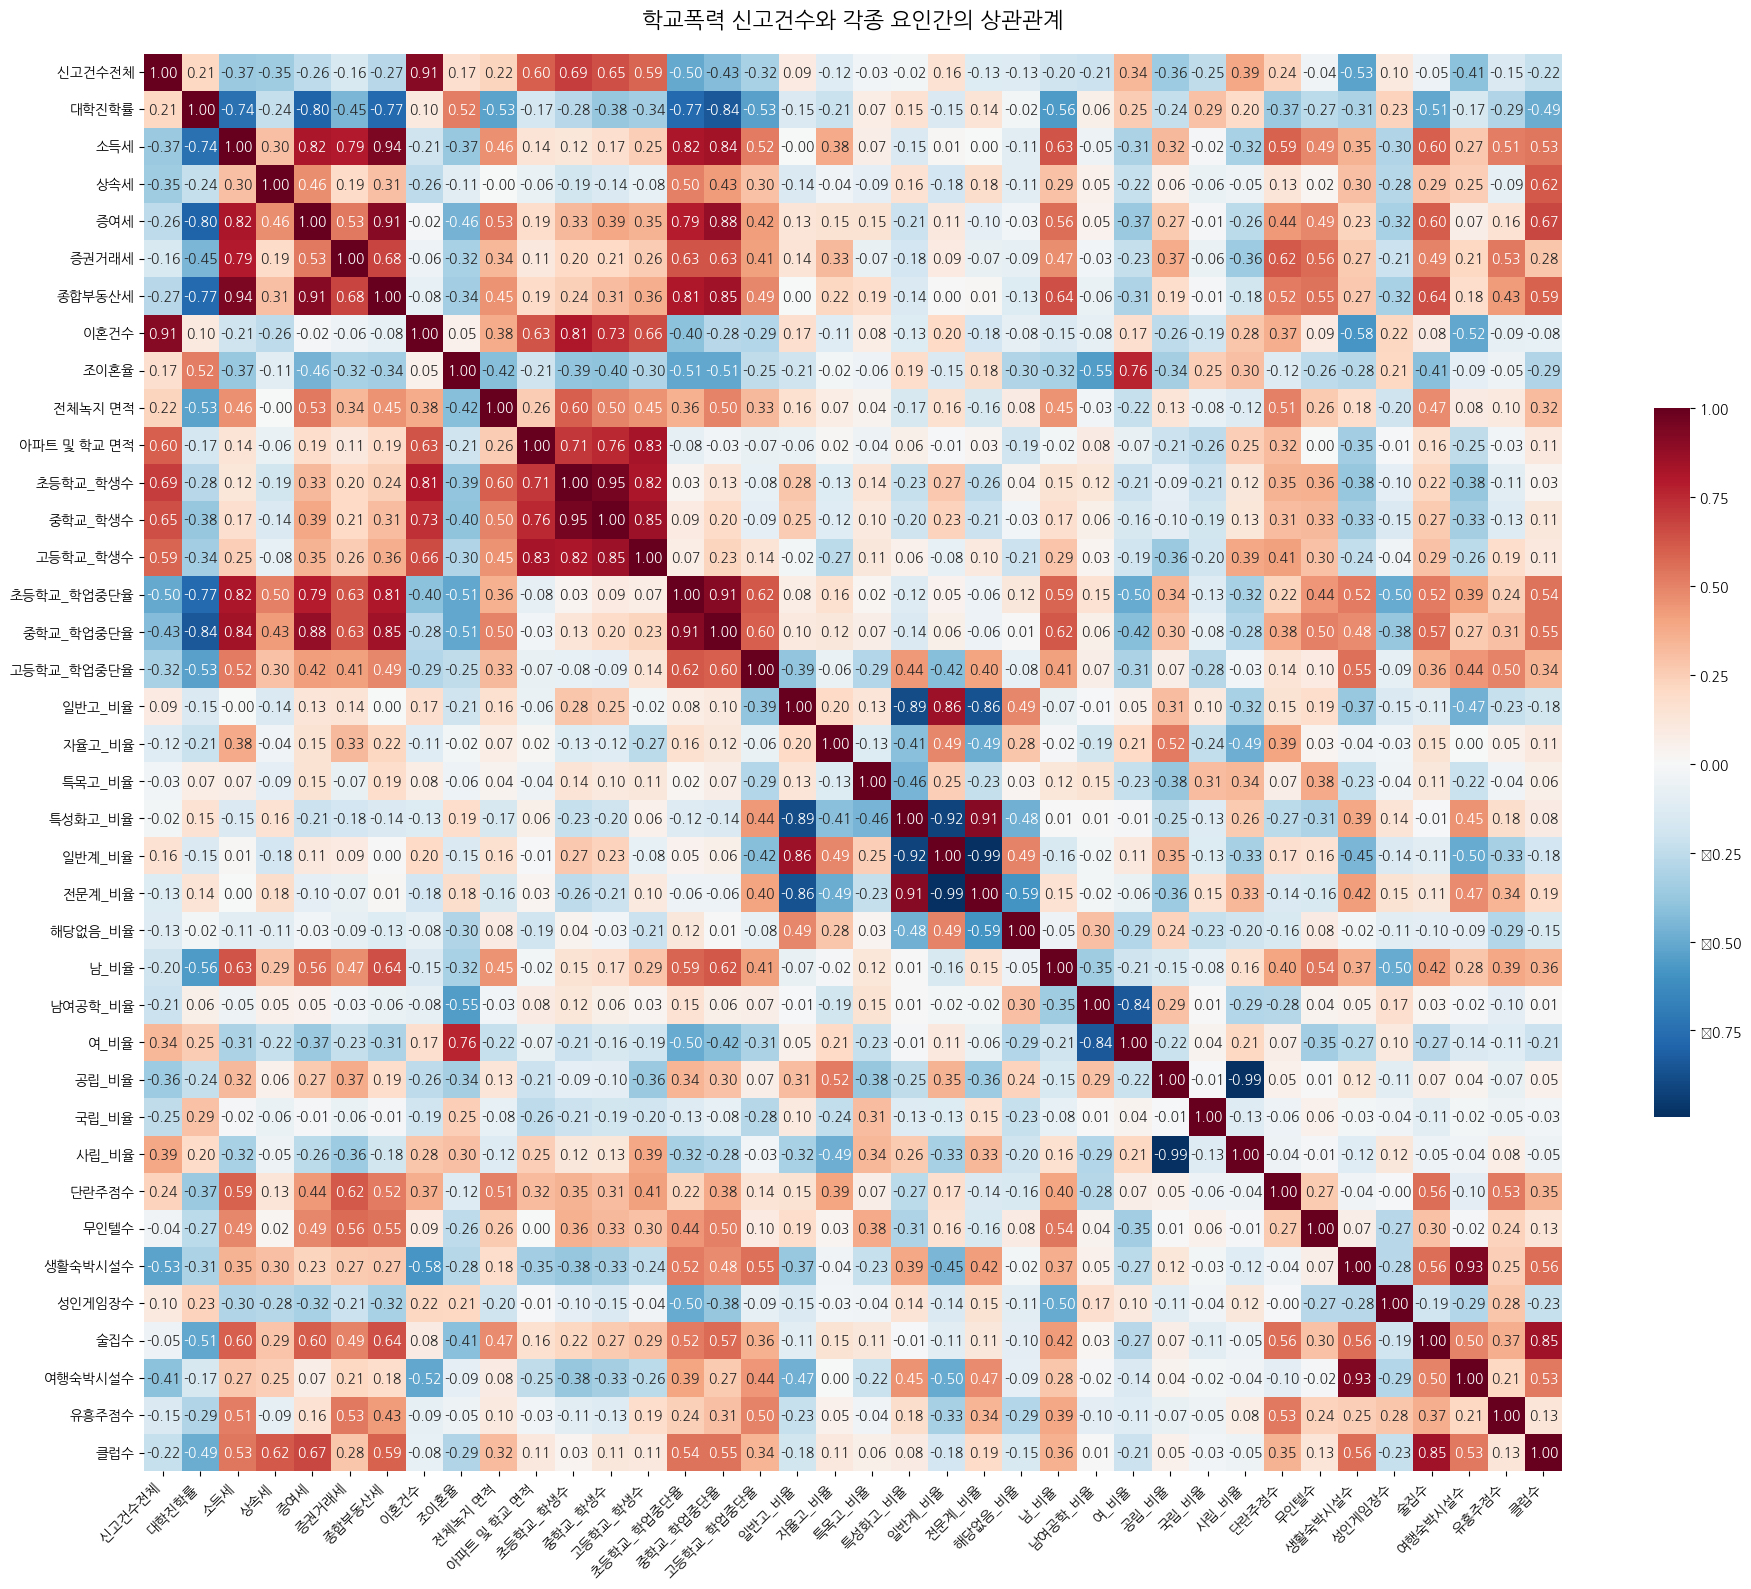

In [112]:
plt.figure(figsize=(20, 16))

# 히트맵 생성
sns.heatmap(correlation_matrix, 
            annot=True,      # 상관계수 표시
            fmt='.2f',       # 소수점 둘째자리까지 표시
            cmap='RdBu_r',   # 빨강-파랑 색상맵 사용
            center=0,        # 0을 중심으로 색상 대칭
            square=True,     # 정사각형 셀
            cbar_kws={'shrink': .5})  # 컬러바 크기 조정

plt.title('학교폭력 신고건수와 각종 요인간의 상관관계', fontsize=16, pad=20)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

plt.show()

# 학교폭력이 가장 적게 일어난 지역과 가장 많이 일어난 지역은 어디?

In [113]:
school_list_df = client.query("SELECT * FROM `airy-lodge-428805-j2.crime_seoul.school_list`").to_dataframe()

C:\Users\wlgus\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [119]:
school_list_df

,행정구,학교종류,설립구분,학교명,도로명주소,남녀공학구분,학교구분,일반실업구분,특수목적고등학교계열
0,중구,각종학교(중),사립,여명학교(중),서울특별시 중구 소파로 99,남여공학,None,None,None
1,강남구,초등학교,공립,서울개현초등학교,서울특별시 강남구 선릉로 15,남여공학,None,None,None
2,강남구,초등학교,공립,서울자곡초등학교,서울특별시 강남구 자곡로 150,남여공학,None,None,None
3,강남구,초등학교,공립,서울율현초등학교,서울특별시 강남구 밤고개로21길 15,남여공학,None,None,None
4,강남구,초등학교,공립,서울세명초등학교,서울특별시 강남구 자곡로 55,남여공학,None,None,None
...,...,...,...,...,...,...,...,...,...
3895,영등포구,평생학교(초)-3년6학기,사립,학력인정 서현초등학교,서울특별시 영등포구 도신로53길 18,남여공학,None,해당없음,None
3896,영등포구,초등학교,공립,서울영문초등학교,서울특별시 영등포구 문래로 56,남여공학,None,해당없음,None
3897,영등포구,초등학교,공립,서울선유초등학교,서울특별시 영등포구 선유로43가길 14,남여공학,None,해당없음,None
3898,영등포구,초등학교,공립,서울대동초등학교,서울특별시 영등포구 대림로21길 6,남여공학,None,해당없음,None


In [120]:
school_counts_3 = school_list_df.groupby(['행정구', '학교종류']).size().unstack(fill_value=0).reset_index()

In [121]:
school_counts_3

학교종류,행정구,각종학교(고),각종학교(중),각종학교(초),고등기술학교,고등학교,공동실습소,방송통신고등학교,방송통신중학교,외국인학교,중학교,초등학교,특수학교,평생학교(고)-2년6학기,평생학교(고)-3년6학기,평생학교(중)-2년6학기,평생학교(초)-3년6학기
0,강남구,0,1,0,0,145,0,3,0,1,24,34,2,0,0,0,0
1,강동구,0,0,0,0,83,0,0,0,0,19,29,2,0,0,0,0
2,강북구,0,0,0,0,59,0,0,0,0,13,14,4,0,0,0,0
3,강서구,0,0,0,0,195,0,0,0,0,22,35,2,0,0,0,0
4,관악구,67,0,0,0,148,0,0,0,0,16,22,2,0,0,0,0
5,광진구,0,1,0,0,83,0,0,0,2,12,21,1,0,0,0,0
6,구로구,1,1,1,0,95,0,0,0,0,14,27,2,0,0,0,0
7,금천구,23,1,0,0,46,0,0,0,0,9,18,0,0,0,0,0
8,노원구,0,1,0,0,229,1,0,0,1,26,42,2,2,0,1,0
9,도봉구,0,0,0,0,51,0,0,0,0,13,23,1,0,0,0,0


In [123]:
school_violence_df = school_violence_df[['행정구', ' 신고건수전체']]
school_violence_df = school_violence_df.groupby('행정구')[' 신고건수전체'].sum().reset_index()

In [124]:
merged_df = pd.merge(school_violence_df, school_counts_3, on='행정구', how='outer')

In [125]:
merged_df['총 학교 수'] = merged_df[['초등학교', '중학교', '고등학교']].sum(axis=1)
merged_df = merged_df.sort_values(by='총 학교 수', ascending=False)

In [126]:
merged_df

,행정구,신고건수전체,각종학교(고),각종학교(중),각종학교(초),고등기술학교,고등학교,공동실습소,방송통신고등학교,방송통신중학교,외국인학교,중학교,초등학교,특수학교,평생학교(고)-2년6학기,평생학교(고)-3년6학기,평생학교(중)-2년6학기,평생학교(초)-3년6학기,총 학교 수
8,노원구,71,0,1,0,0,229,1,0,0,1,26,42,2,2,0,1,0,297
3,강서구,79,0,0,0,0,195,0,0,0,0,22,35,2,0,0,0,0,252
21,은평구,69,16,0,0,0,180,0,0,0,0,18,30,1,0,0,0,0,228
0,강남구,40,0,1,0,0,145,0,3,0,1,24,34,2,0,0,0,0,203
17,송파구,72,0,0,0,0,123,0,0,0,0,29,41,2,2,6,1,1,193
4,관악구,51,67,0,0,0,148,0,0,0,0,16,22,2,0,0,0,0,186
23,중구,17,10,2,0,0,151,0,0,0,1,8,12,0,0,0,0,0,171
16,성북구,39,0,0,0,0,120,0,3,0,0,18,29,1,0,0,0,0,167
18,양천구,69,0,0,0,0,96,0,0,0,0,19,30,0,0,0,0,0,145
22,종로구,8,69,0,0,0,118,0,3,0,1,9,13,4,2,0,1,0,140


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22128\3052978388.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(merged_df['행정구'], rotation=45)


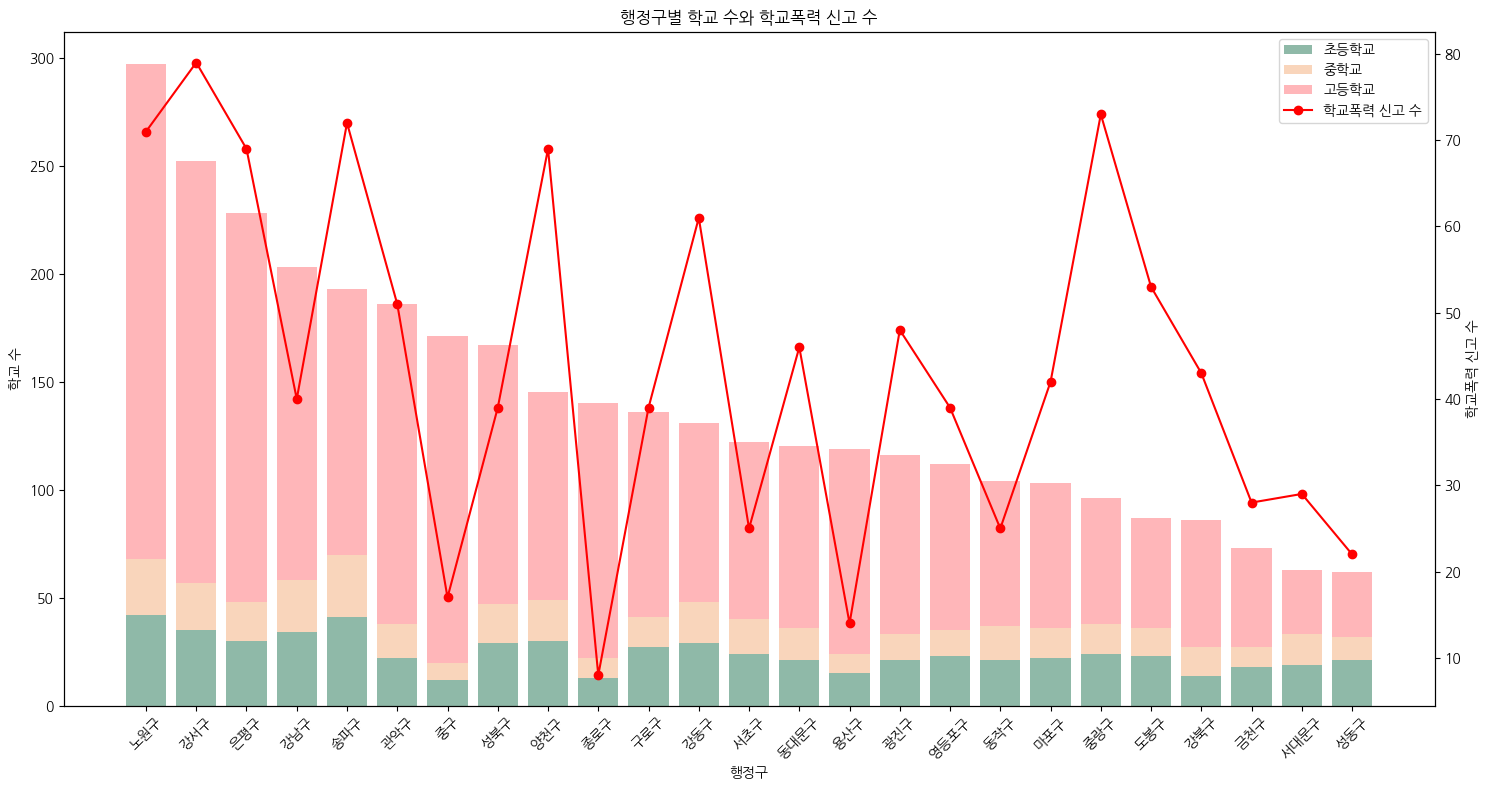

In [127]:
fig, ax1 = plt.subplots(figsize=(15, 8))

school_types = ['초등학교', '중학교', '고등학교']
colors = ['#8fb9a8', '#f9d5bb', '#ffb6b9']  # Softer colors
bottom_value = np.zeros(len(merged_df))

for i, school in enumerate(school_types):
    if school in merged_df.columns:
        ax1.bar(merged_df['행정구'], merged_df[school], bottom=bottom_value, color=colors[i], label=school)
        bottom_value += merged_df[school]

ax1.set_xlabel('행정구')
ax1.set_ylabel('학교 수')
ax1.set_title('행정구별 학교 수와 학교폭력 신고 수')
ax1.set_xticklabels(merged_df['행정구'], rotation=45)

ax2 = ax1.twinx()
ax2.plot(merged_df['행정구'], merged_df[' 신고건수전체'], color='red', marker='o', linestyle='-', label='학교폭력 신고 수')
ax2.set_ylabel('학교폭력 신고 수')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

In [128]:
merged_df['신고 수 비율'] = merged_df[' 신고건수전체'] / merged_df[['초등학교', '중학교', '고등학교']].sum(axis=1)

In [129]:
merged_df = merged_df.sort_values(by='신고 수 비율', ascending=False)

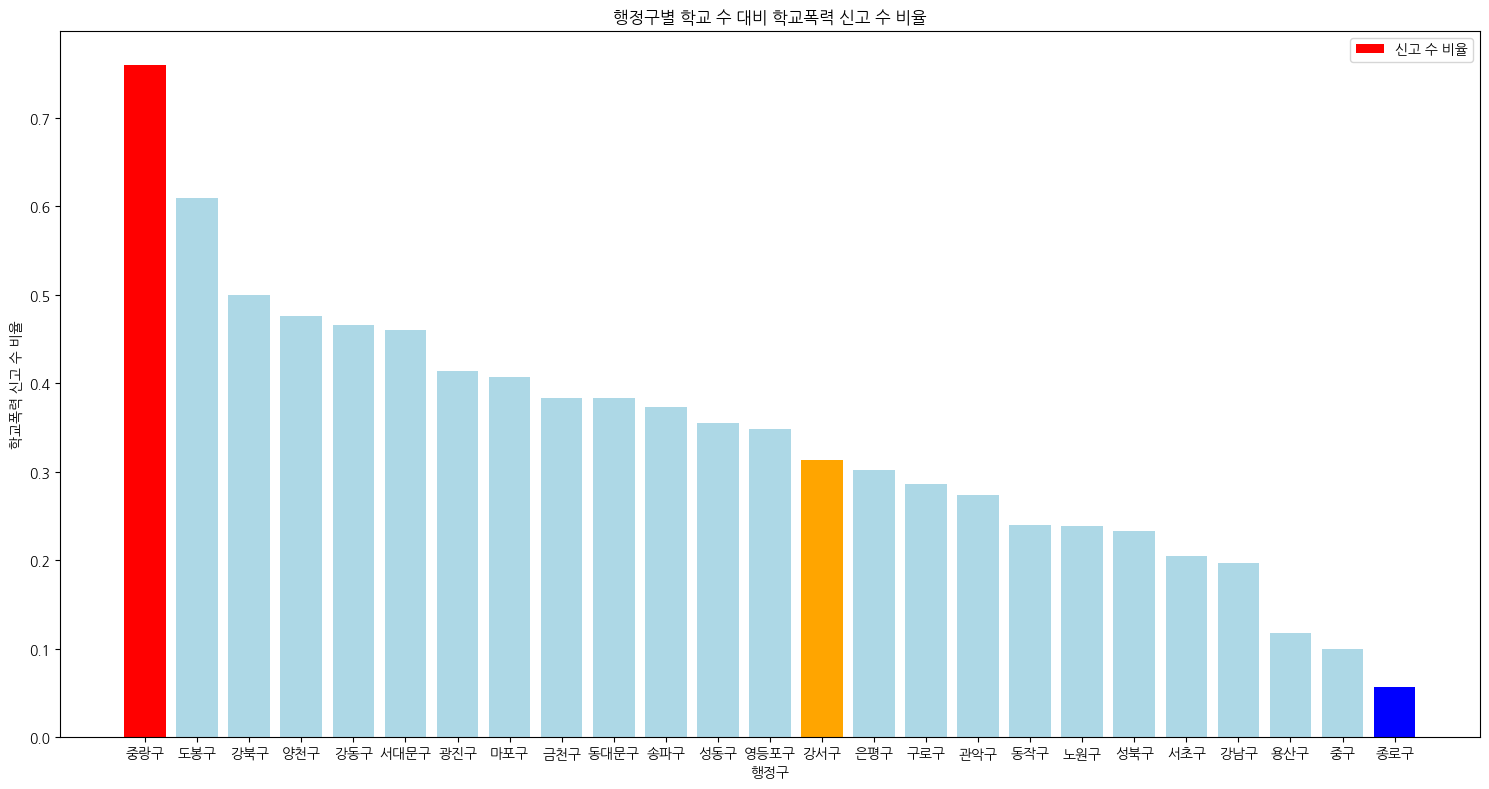

In [130]:
fig, ax = plt.subplots(figsize=(15, 8))
colors = ['red' if i == 0 else 'orange' if merged_df['행정구'].iloc[i] == '강서구' else 'blue' if i == len(merged_df) - 1 else 'lightblue' for i in range(len(merged_df))]
ax.bar(merged_df['행정구'], merged_df['신고 수 비율'], color=colors)

ax.set_xlabel('행정구')
ax.set_ylabel('학교폭력 신고 수 비율')
ax.set_title('행정구별 학교 수 대비 학교폭력 신고 수 비율')
ax.legend(['신고 수 비율'], loc='upper right')

plt.tight_layout()
plt.show()